In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# !pip install openpyxl

## Read all datasets

In [3]:
customer=pd.read_excel('data/CustomersData.xlsx')
discount=pd.read_csv('data/Discount_Coupon.csv')
marketing=pd.read_csv('data/Marketing_Spend.csv')
sales=pd.read_csv('data/Online_Sales.csv')
tax=pd.read_excel('data/Tax_amount.xlsx')

In [4]:
customer.head(2)

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43


In [5]:
discount.head(2)

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20


In [6]:
marketing.head(2)

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36


In [7]:
sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used


In [8]:
tax.head(2)

,Product_Category,GST
0,Nest-USA,0.1
1,Office,0.1


## Check Null values

In [9]:
sales.isnull().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64

In [10]:
customer.isnull().sum()

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64

In [11]:
discount.isnull().sum()

Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64

In [12]:
marketing.isnull().sum()

Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64

In [13]:
tax.isnull().sum()

Product_Category    0
GST                 0
dtype: int64

## Check Duplicate records

In [14]:
sales.duplicated().sum()

np.int64(0)

In [15]:
customer.duplicated().sum()

np.int64(0)

In [16]:
discount.duplicated().sum()

np.int64(0)

In [17]:
marketing.duplicated().sum()

np.int64(0)

In [18]:
tax.duplicated().sum()

np.int64(0)

## Question 1
### Identify the months with the highest and lowest acquisition rates. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?

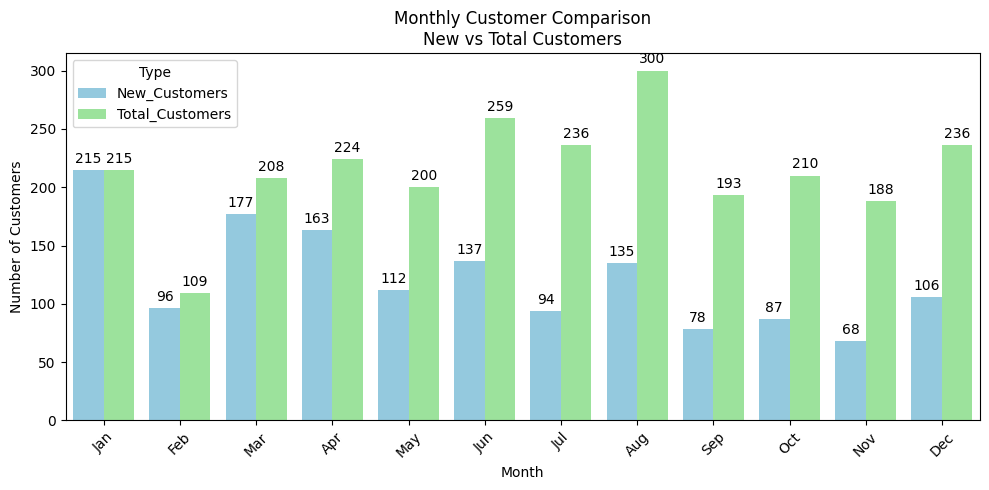

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to datetime
sales['Transaction_Date'] = pd.to_datetime(sales['Transaction_Date'])

# Create month column
sales['Month'] = sales['Transaction_Date'].dt.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Get new customers (first purchases)
first_purchases = sales.groupby('CustomerID')['Transaction_Date'].min().reset_index()
first_purchases['Month'] = first_purchases['Transaction_Date'].dt.strftime('%b')
new_customers = first_purchases['Month'].value_counts().reindex(month_order).reset_index()
new_customers.columns = ['Month', 'New_Customers']

# Get total customers (all unique customers per month)
total_customers = sales.groupby('Month')['CustomerID'].nunique().reindex(month_order).reset_index()
total_customers.columns = ['Month', 'Total_Customers']

# Combine data
plot_data = pd.merge(new_customers, total_customers, on='Month')
plot_data = pd.melt(plot_data, id_vars='Month', var_name='Type', value_name='Count')

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=plot_data, x='Month', y='Count', hue='Type', 
                palette=['skyblue', 'lightgreen'])

plt.title('Monthly Customer Comparison\nNew vs Total Customers')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Add values on bars
for container in ax.containers:
    ax.bar_label(container, padding=3, fmt='%g')

plt.tight_layout()
plt.show()

---

###  **Inferences from the Chart**

* **Highest Acquisition:** January (`215` new customers)
* **Lowest Acquisition:** November (`68` new customers)
* Overall, the first quarter (especially Jan–Apr) saw **higher acquisition**, while Q4 saw a **decline**.

---

###  **Strategies to Address Fluctuations**

####  **1. Understand What Worked in January**

* **Marketing Push:** Analyze if marketing budget or campaigns were heavier in January.
* **New Year Discounts:** Leverage similar promo mechanics in other months.
* **Customer Segments:** Study who joined and replicate targeting.

####  **2. Tackle Low Months like November**

* **Launch Campaigns Ahead of Time:** Run early bird discounts and awareness campaigns in October.
* **Festival Boosters:** Align offers with local/festival events (Diwali, Thanksgiving, etc.)
* **Referral or Loyalty Offers:** Incentivize existing users to bring in new customers.

####  **3. Ensure Year-Round Consistency**

* **Monthly Campaign Calendar:** Plan smaller, sustained acquisition campaigns rather than peaking only in Jan.
* **Optimize Product Visibility:** Run rotating discounts or highlight best-selling categories.
* **Personalization:** Use customer data to run targeted ads and emails during low-conversion months.

####  **4. Monitor KPIs and Iterate**

* Track:

  * Customer acquisition cost (CAC)
  * Marketing ROI per month
  * Conversion funnel performance
---


## Question 2
### Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?

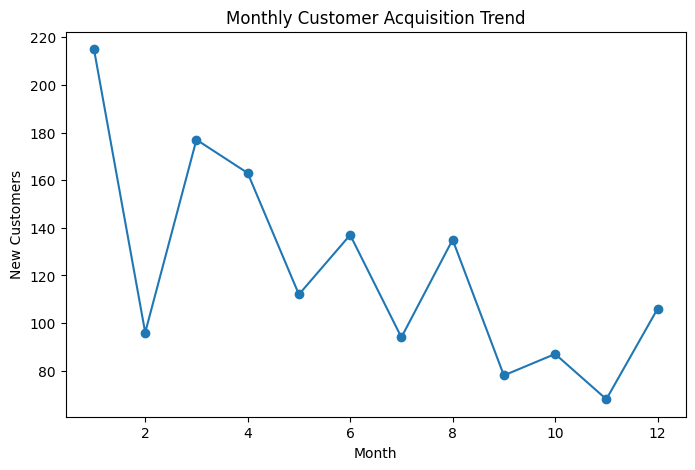

In [20]:
#Get the first purchase date for each customer
first_purchase = sales.groupby('CustomerID')['Transaction_Date'].min().reset_index()
#Extract the acquisition month from the first purchase date
first_purchase['Acquisition_Month'] = first_purchase['Transaction_Date'].dt.month
monthly_acquisition = first_purchase['Acquisition_Month'].value_counts().sort_index()
monthly_acquisition.plot(kind='line', marker='o', figsize=(8, 5), title='Monthly Customer Acquisition Trend')
plt.xlabel('Month')
plt.ylabel('New Customers')
plt.show()


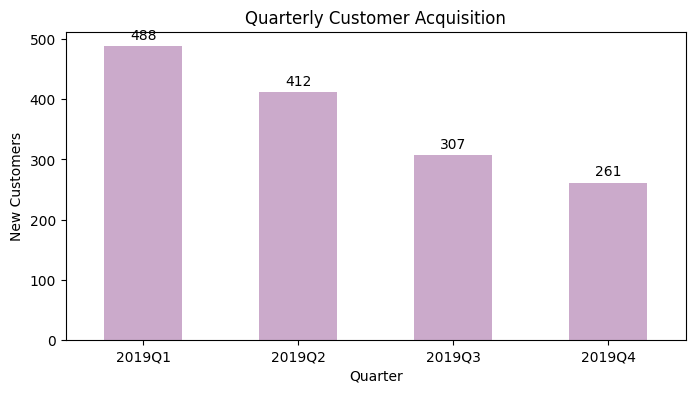

In [21]:
# Convert the 'Transaction_Date' column to quarterly periods (e.g., Q1 2024)
first_purchase['Quarter'] = first_purchase['Transaction_Date'].dt.to_period('Q')

# Count the number of new customer acquisitions in each quarter and sort by time
quarterly_acquisition = first_purchase['Quarter'].value_counts().sort_index()

# Plot the quarterly acquisition as a bar chart
ax = quarterly_acquisition.plot(kind='bar', color='#CBAACB', figsize=(8, 4), title='Quarterly Customer Acquisition')

plt.ylabel('New Customers')
plt.xticks(rotation=0)
ax.bar_label(ax.containers[0], padding=3)
plt.show()


## **Analysis of Quarterly Customer Acquisition**

### **Observed Trend:**

* **Q1 (2019Q1)**: Highest acquisition — **488 new customers**
* **Q2 (2019Q2)**: Slight drop — **412 customers**
* **Q3 (2019Q3)**: Noticeable drop — **307 customers**
* **Q4 (2019Q4)**: Lowest acquisition — **261 customers**

This shows a **consistent quarterly decline** in customer acquisition from **Q1 to Q4**, suggesting a strong **seasonal pattern** or **front-loaded demand**.

---

##  **Insights & Interpretation**

###  **High-Performing Quarter (Q1)**

* Likely driven by:

  * New Year resolutions and fresh budgets
  * Seasonal marketing or promotional campaigns
  * High customer motivation post-holiday season
* This is a time of **peak engagement and conversion**

###  **Low-Performing Quarter (Q4)**

* Possible reasons:

  * Budget exhaustion by end of year
  * Lack of new campaigns
  * Holiday season distractions
  * Lower ad spend or campaign fatigue

---

##  **Strategic Recommendations**

###  **Capitalize on High-Performing Periods (Q1)**

1. **Increase marketing investment** during Q1 for maximum ROI.
2. **Introduce new product launches** or referral programs early in the year.
3. **Offer annual subscription discounts** or bundles while interest is high.
4. Use Q1 as a time to **collect data and leads** that can be nurtured throughout the year.

###  **Boost Acquisition in Slower Quarters (Q3, Q4)**

1. **Run holiday-themed campaigns** in Q4 (Diwali, Christmas, New Year’s Eve).
2. **Retarget dormant leads** from Q1 and Q2 with discounts or personalized offers.
3. Offer **limited-time coupons or loyalty incentives**.
4. Experiment with **new acquisition channels** (e.g., influencers, partnerships).
5. Conduct **customer feedback** surveys in Q3 to understand drop-off reasons.

---

##  **Conclusion**

There is a **clear decline** in customer acquisition as the year progresses, with **Q1 being the strongest** and **Q4 the weakest**. By doubling down on Q1 and applying strategic campaign efforts in Q3–Q4, the company can **balance acquisition throughout the year** and ensure **sustainable growth**.

---

## Question 3
###  Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?

IMP POINTS

If customers make another purchase in the same month (e.g., January), it is not counted as retention.
Customer comes back in a future period (next month, quarter, year) — not in the same period.
so for findinf first_transaction use on month- year and not date

![Alt Text](formulae/retention_formula.png)

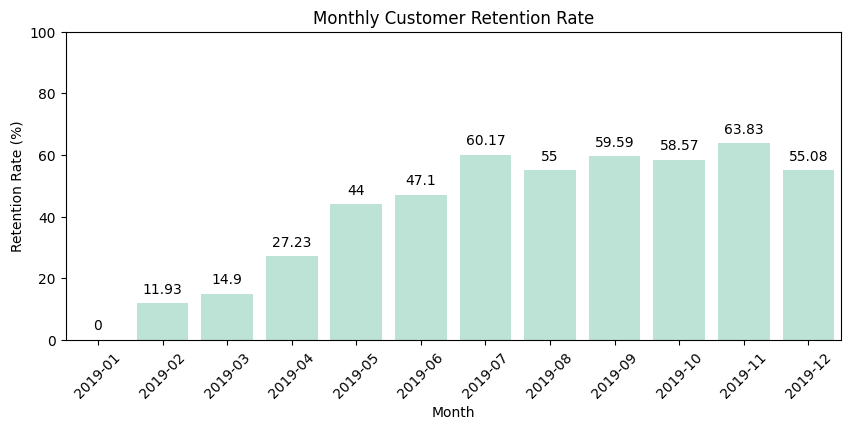

In [22]:
# Create a copy of the original sales data to avoid modifying it directly
sales_data = sales.copy()

# Get the first transaction date for each customer
sales_data['first_transaction_date'] = sales_data.groupby('CustomerID')['Transaction_Date'].transform('min')

# Extract the month and year (in Period format) from both first transaction and actual transaction dates
sales_data['first_transaction_month'] = sales_data['first_transaction_date'].dt.to_period('M')
sales_data['transaction_month'] = sales_data['Transaction_Date'].dt.to_period('M')

# Determine retention status: 'new' if it's the customer's first transaction month, else 'retained'
sales_data['retention_status'] = sales_data.apply(lambda row: 'new' if row['transaction_month'] == row['first_transaction_month'] else 'retained',axis=1)

# Group by transaction month and retention status, counting unique customers in each group
monthwise_status = sales_data.groupby(['transaction_month', 'retention_status'])['CustomerID'].nunique().reset_index()

# Pivot the data to get separate columns for 'new' and 'retained' customer counts
pivot_df = monthwise_status.pivot(index='transaction_month',columns='retention_status',values='CustomerID').fillna(0)  # Fill any missing values with 0

# Calculate monthly retention rate = (retained / total customers) * 100, rounded to 2 decimal places
pivot_df['retention_rate'] = round((pivot_df['retained'] / (pivot_df['new'] + pivot_df['retained'])) * 100,2)

# Reset index for better display (optional, useful when plotting or exporting)
pivot_df.reset_index()

# -------------------------- Plotting Section --------------------------

# Set figure size for the plot
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=pivot_df,x=pivot_df.index, y=pivot_df['retention_rate'], color='#B5EAD7')

plt.title('Monthly Customer Retention Rate')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
ax.bar_label(ax.containers[0], padding=5)
plt.show()

In [23]:
pivot_df

retention_status,new,retained,retention_rate
transaction_month,,,
2019-01,215.0,0.0,0.00
2019-02,96.0,13.0,11.93
2019-03,177.0,31.0,14.90
2019-04,163.0,61.0,27.23
2019-05,112.0,88.0,44.00
2019-06,137.0,122.0,47.10
2019-07,94.0,142.0,60.17
2019-08,135.0,165.0,55.00
2019-09,78.0,115.0,59.59


###  **1. Inferences**

###  **Strongest Retention Periods**

* **November 2019 (63.83%)** – *Highest retention*
* **July 2019 (60.17%)**
* **September 2019 (59.59%)**
* **October 2019 (58.57%)**

> 🔎 These months show strong retention, indicating that your customers were likely more satisfied, engaged, or found greater value during this time.

---

###  **Weakest Retention Periods**

* **January 2019 (0%)** – *No customers retained (likely startup month or baseline)*
* **February 2019 (11.93%)**
* **March 2019 (14.9%)**
* **April 2019 (27.23%)**

>  The first quarter shows very weak retention, likely due to issues in **onboarding**, **value proposition clarity**, or **user engagement**.

---

###  **2. Trend Insights**

* There is a **steady increase** from January through July.
* A **plateau** is seen from August to November.
* **Slight drop** in December may be due to **holiday seasonality** or end-of-year churn.

---

###  **3. Strategies to Improve Retention During Weaker Months**

###  **A. Improve Onboarding Experience**

* Target weak retention months (e.g., Jan–Mar) with:

  * Clear tutorials
  * Interactive walkthroughs
  * Welcome emails + early engagement nudges
* Use **user behavior tracking** to spot early drop-offs.

###  **B. Implement Re-engagement Campaigns**

* For customers showing inactivity in the first 1–2 weeks:

  * Use **automated emails**, **push notifications**, or **special offers** to bring them back.
  * Highlight key features or customer success stories.

###  **C. Incentivize Early Retention**

* Offer **discounts or rewards** for continued usage in the first 30 days.
* Launch a **“First Month Challenge”** or **loyalty points system**.

###  **D. Gather Exit Feedback**

* Prompt users who cancel or stop using the service with a 1-question exit survey.
* Use feedback to pinpoint pain points in weak months.

###  **E. Align with Seasonality**

* If Jan–Mar is naturally slower, launch **exclusive campaigns**, **referral bonuses**, or **new features** in these months to increase excitement.

###  **F. Proactive Customer Support**

* Use human onboarding touchpoints (e.g., call or live chat support) for new users in weak retention periods.
* Flag high-risk users and reach out early.

---

###  **4. Summary Table**

| Period       | Retention Rate | Classification | Strategy                                                    |
| ------------ | -------------- | -------------- | ----------------------------------------------------------- |
| Jan–Mar 2019 | 0–14.9%        | Weakest        | Improve onboarding, early engagement, collect exit feedback |
| Apr–Jun 2019 | 27–47%         | Moderate       | Add value nudges, engage inactive users, early rewards      |
| Jul–Nov 2019 | 55–64%         | Strongest      | Analyze what worked, replicate in weaker months             |
| Dec 2019     | 55.08%         | Slight dip     | Compensate for seasonality with engagement campaigns        |

---


## Question 4
### Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.

In [24]:
# Example retention month classification
high_retention_months = ['2019-07','2019-08', '2019-09', '2019-10','2019-11','2019-12']
low_retention_months = ['2019-01', '2019-02', '2019-03','2019-04','2019-05','2019-06']

# Load or filter sales_data
# sales_data = pd.read_csv('your_sales_data.csv')

# Add a column to classify month as high or low retention
def classify_retention_period(month):
    if str(month) in high_retention_months:
        return 'High'
    elif str(month) in low_retention_months:
        return 'Low'
    else:
        return 'Medium'

sales_data['Retention_Period'] = sales_data['transaction_month'].apply(classify_retention_period)
sales_data.Retention_Period.value_counts()

Retention_Period
High    28316
Low     24608
Name: count, dtype: int64

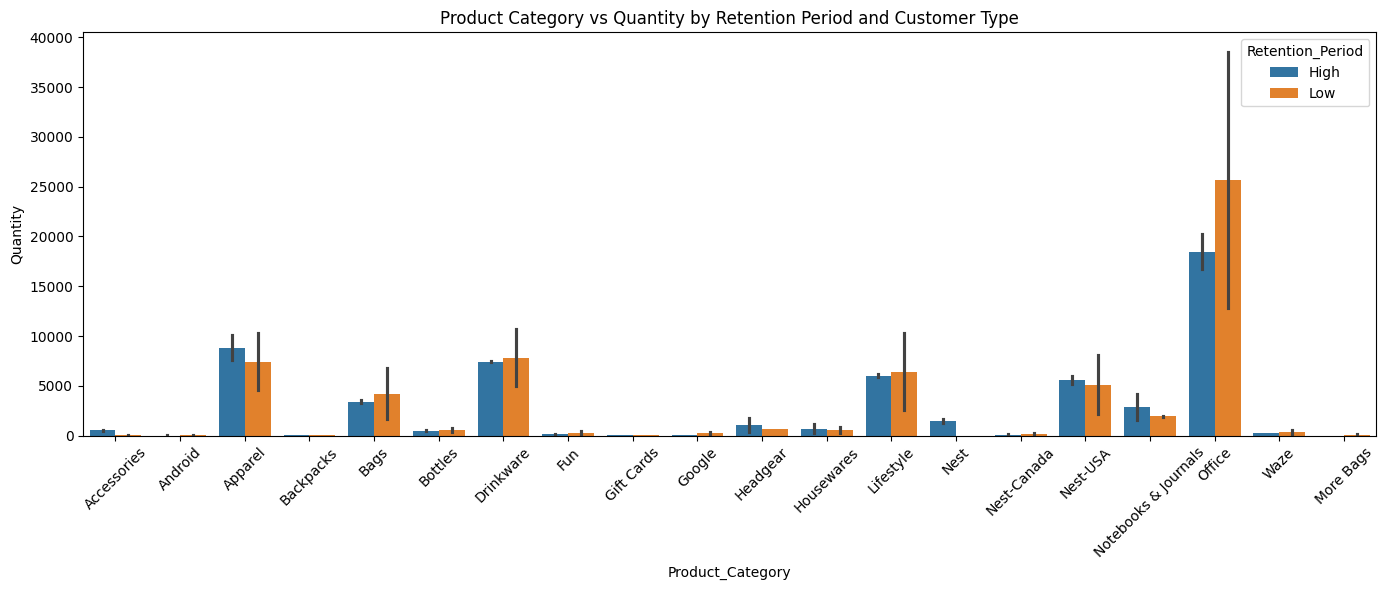

In [25]:
# Group by retention period, product category, and retention status
category_behavior = sales_data.groupby(['Retention_Period', 'Product_Category', 'retention_status'])['Quantity'].sum().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_behavior,
    x='Product_Category',
    y='Quantity',
    hue='Retention_Period'
)
plt.title('Product Category vs Quantity by Retention Period and Customer Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:

# # join sales df with discount to get at discount percentage product category wise
# sales_data=sales_data.merge(discount , on=['Product_Category','Month'], how='left')
# sales_data.drop(columns=['Coupon_Code'],inplace=True)
# # Plot
# plt.figure(figsize=(14, 6))
# sns.countplot(
#     data=category_behavior,
#     x='Coupon_Status',
#     hue='Retention_Period'
# )
# plt.title('Product Category vs Quantity by Retention Period and Customer Type')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

## Question 5
### Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts

#### Find sales amount for each transaction
![Alt Text](formulae/Revenue_formula1.png)

In [27]:
sales_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,first_transaction_date,first_transaction_month,transaction_month,retention_status,Retention_Period
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01-01,2019-01,2019-01,new,Low
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01-01,2019-01,2019-01,new,Low
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019-01-01,2019-01,2019-01,new,Low
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019-01-01,2019-01,2019-01,new,Low
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019-01-01,2019-01,2019-01,new,Low


In [28]:
# Join sales df with tax df on product category
sales_data= sales_data.merge(tax , on = 'Product_Category', how='left')

# join sales df with discount to get at discount percentage product category wise
sales_data=sales_data.merge(discount , on=['Product_Category','Month'], how='left')
sales_data.drop(columns=['Coupon_Code'],inplace=True)

# Create a new column 'final_discount' based on coupon used or not used
sales_data['final_discount'] = sales_data.apply(lambda row: row['Discount_pct'] if row['Coupon_Status'] == 'Used' else 0,axis=1)

# Find out final sales amount for each transaction using - quantity, average price, discount & delivery charge
sales_data['Revenue']=(sales_data['Quantity']*sales_data['Avg_Price']*(1-(sales_data['Discount_pct']/100))*(1+sales_data['GST'])) + sales_data['Delivery_Charges']


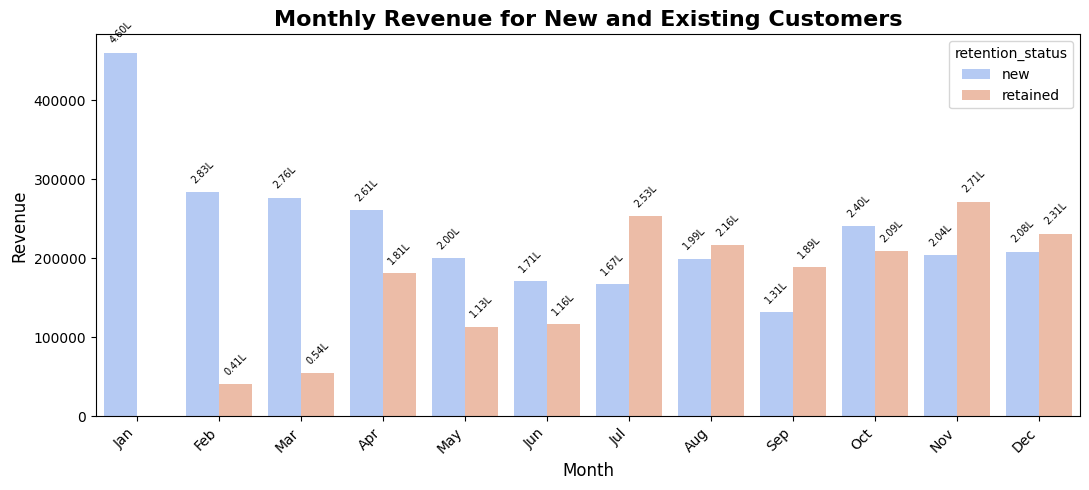

In [29]:
# Group by Month and Retention Status, summing up Revenue
agg_sales = sales_data.groupby(['Month', 'retention_status'])['Revenue'].sum().reset_index()

# Define month order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert Month to categorical with proper order
agg_sales['Month'] = pd.Categorical(agg_sales['Month'], categories=month_order, ordered=True)

# Sort the DataFrame based on the Month order
agg_sales = agg_sales.sort_values('Month')

plt.figure(figsize=(11,5))
#Plot a graph
ax = sns.barplot(data=agg_sales, x='Month', y='Revenue', hue='retention_status', palette='coolwarm')

plt.title('Monthly Revenue for New and Existing Customers', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add bar labels for each bar in the plot
for container in ax.containers:
    ax.bar_label(container, labels=[f'{(v.get_height()/1e5):.2f}L' for v in container], padding=5, fontsize=7, color='black', rotation=45)

plt.tight_layout()
plt.show()


## Question 6
### Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?

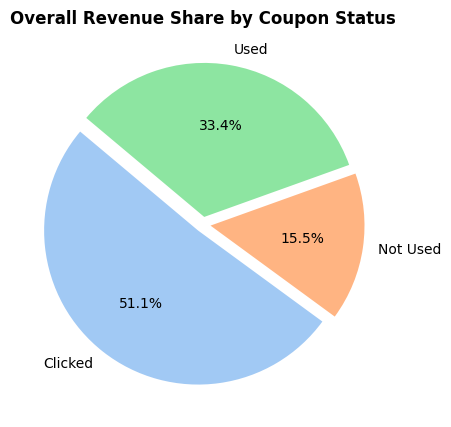

In [30]:
# Compare overall revenue with 3 categories of coupon status

# 1. Group data by Coupon_Status and sum Revenue
coupon_revenue = sales_data.groupby('Coupon_Status')['Revenue'].sum()

# 2. Plot pie chart
plt.figure(figsize=(5, 5))

plt.pie(coupon_revenue, labels=coupon_revenue.index, autopct='%1.1f%%', startangle=140,colors=sns.color_palette('pastel'), explode=[0.05, 0.05, 0.05]  )

plt.title('Overall Revenue Share by Coupon Status', fontsize=12, fontweight='bold')
plt.show()



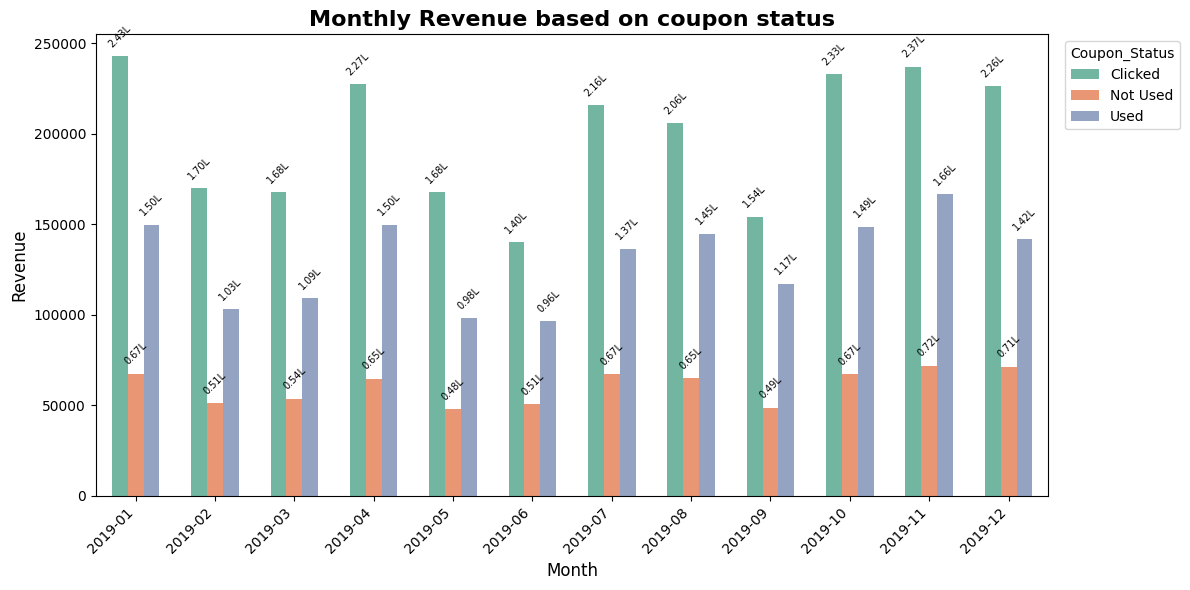

In [31]:
# Compare mothwise revenue by discount categories - used, not-used, clicked

plt.figure(figsize=(12,6))

# Group by Month and coupon status, summing up Revenue
## OR WE CAN ADD estimator argument in sns.barplot()
agg_sales = sales_data.groupby(['transaction_month', 'Coupon_Status'])['Revenue'].sum().reset_index()

# Use a color palette and create the bar plot
ax = sns.barplot(data=agg_sales, x='transaction_month', y='Revenue', hue='Coupon_Status', palette='Set2', width=0.6)

plt.title('Monthly Revenue based on coupon status', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Coupon_Status', bbox_to_anchor=(1.01, 1), loc='upper left') 
for container in ax.containers:
    ax.bar_label(container, labels=[f'{(v.get_height()/1e5):.2f}L' for v in container], padding=5, fontsize=7, color='black', rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


## Question 7
### Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?

### Analysis - Product wise total quantity

In [32]:
# Top performing products - Quantity wise
sales_data.groupby('Product_Category')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head(5)

,Product_Category,Quantity
18,Office,88383
2,Apparel,32438
6,Drinkware,30501
12,Lifestyle,24881
16,Nest-USA,21430


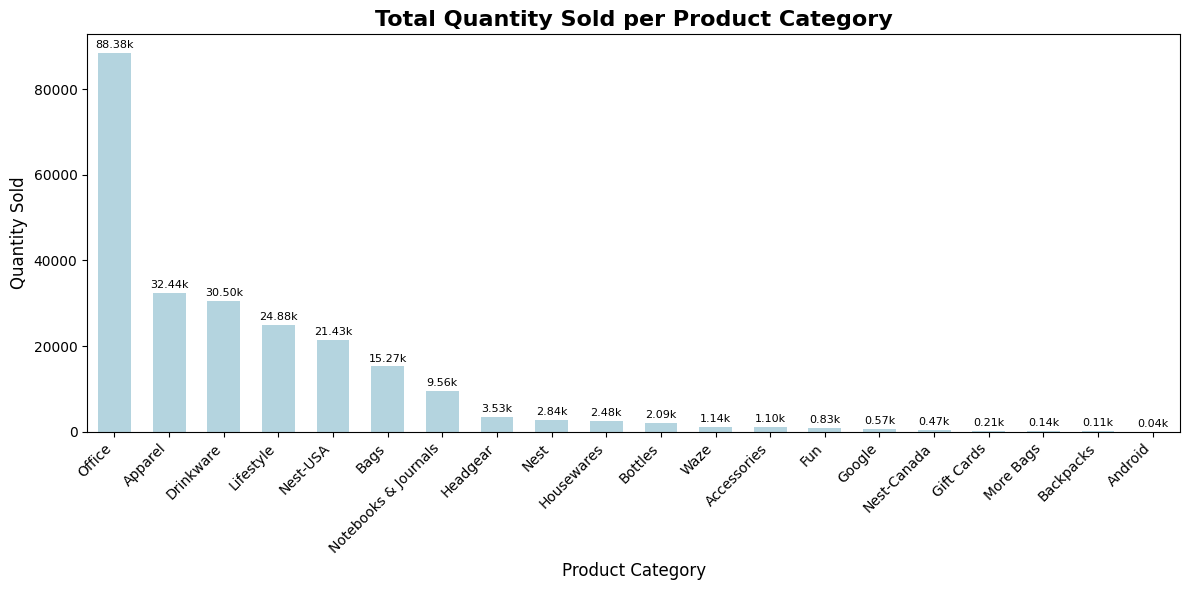

In [33]:
# Product wise sales - total number of units

plt.figure(figsize=(12,6))

# Groupby product category
product_quantity=sales_data.groupby('Product_Category')['Quantity'].sum().reset_index()
# Sort by Quantity in descending order
product_quantity = product_quantity.sort_values(by='Quantity', ascending=False)

# Use a color palette and create the bar plot
ax = sns.barplot(data=product_quantity, x='Product_Category', y='Quantity', color='lightblue', width=0.6)

# Title and labels
plt.title('Total Quantity Sold per Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)

# Rotating X-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add bar labels for each bar in the plot
# ax.containers is a list of containers for each hue category
for container in ax.containers:
    ax.bar_label(container, labels=[f'{(v.get_height()/1e3):.2f}k' for v in container], padding=2, fontsize=8, color='black')

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [34]:
# # Assuming 'Month' is your column for months in 'sales_data'
# months = sales_data['Month'].unique()  # Get unique months

# # Loop through each month and plot separately
# for month in months:
#     plt.figure(figsize=(12, 6))  # Create a new figure for each month
    
#     # Filter the data for the current month
#     month_data = sales_data[sales_data['Month'] == month]

#     # To plot categories from descending order of quantity
#     # Manually aggregate the data by summing up Quantity for each Product_Category
#     month_aggregated = month_data.groupby('Product_Category')['Quantity'].sum().reset_index()
#     # Sort the data by Quantity in descending order
#     month_aggregated = month_aggregated.sort_values(by='Quantity', ascending=False)
    
#     # Use a color palette and create the bar plot
#     ax = sns.barplot(data=month_aggregated, x='Product_Category', y='Quantity', color='lightblue', width=0.6)

#     # Title and labels
#     plt.title(f'Total Quantity Sold in {month}', fontsize=16, fontweight='bold')
#     plt.xlabel('Product Category', fontsize=12)
#     plt.ylabel('Quantity Sold', fontsize=12)

#     # Rotating X-axis labels for better readability
#     plt.xticks(rotation=45, ha='right')

#     # Add bar labels for each bar in the plot
#     for container in ax.containers:
#         ax.bar_label(container, padding=5, fontsize=7, color='black', rotation=45)

#     # Display the plot
#     plt.tight_layout()  # Adjust layout for better spacing
#     plt.show()


In [35]:
sales_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,first_transaction_date,first_transaction_month,transaction_month,retention_status,Retention_Period,GST,Discount_pct,final_discount,Revenue
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01-01,2019-01,2019-01,new,Low,0.10,10.0,10.0,158.6729
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,2019-01-01,2019-01,2019-01,new,Low,0.10,10.0,10.0,158.6729
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,Jan,2019-01-01,2019-01,2019-01,new,Low,0.10,10.0,10.0,8.5295
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,Jan,2019-01-01,2019-01,2019-01,new,Low,0.18,10.0,0.0,99.5843
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,Jan,2019-01-01,2019-01,2019-01,new,Low,0.18,10.0,10.0,24.0230


### Analysis - Product wise total sales

In [36]:
# Top performing products - Revenue wise
sales_data.groupby('Product_Category')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False).head(5)

,Product_Category,Revenue
16,Nest-USA,2.351316e+06
2,Apparel,7.354504e+05
14,Nest,4.399770e+05
18,Office,3.440001e+05
6,Drinkware,2.402678e+05


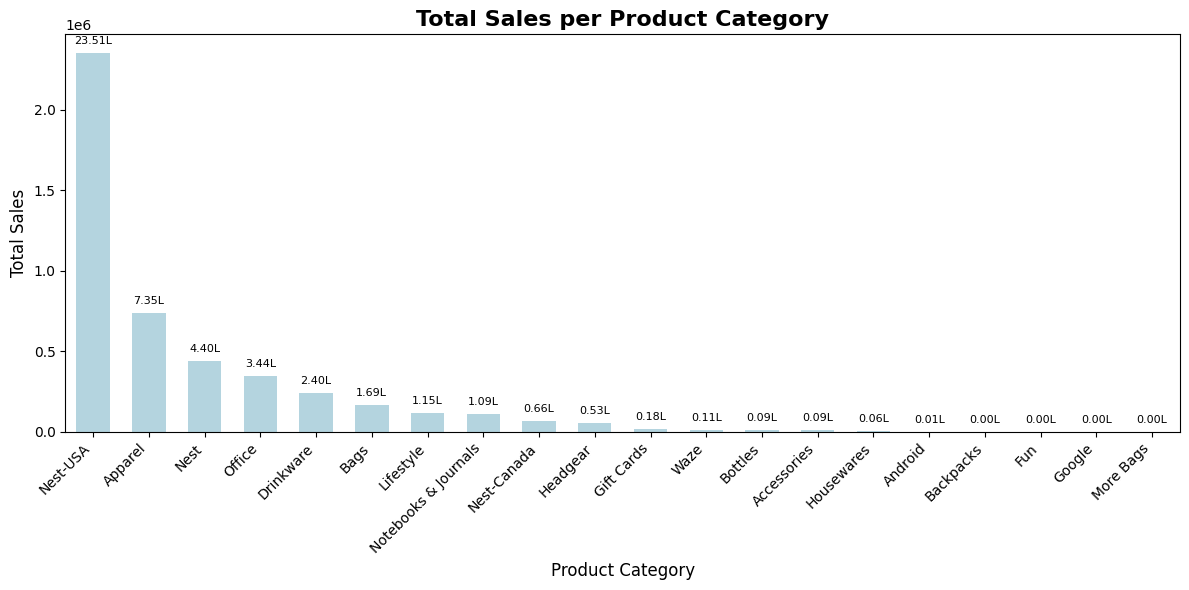

In [37]:
# Product wise sales

# Groupby product revenue
product_revenue=sales_data.groupby('Product_Category')['Revenue'].sum().reset_index()
# Sort by Quantity in descending order
product_revenue = product_revenue.sort_values(by='Revenue', ascending=False)

plt.figure(figsize=(12,6))
# Use a color palette and create the bar plot
ax = sns.barplot(data=product_revenue, x='Product_Category', y='Revenue', color='lightblue', width=0.6)

# Title and labels
plt.title('Total Sales per Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{(v.get_height()/1e5):.2f}L' for v in container], padding=5, fontsize=8, color='black')
plt.tight_layout()
plt.show()


In [38]:
# # Assuming 'Month' is your column for months in 'sales_data'
# months = sales_data['Month'].unique()  # Get unique months

# # Loop through each month and plot separately
# # for month in months:
#     plt.figure(figsize=(12, 6))  # Create a new figure for each month
    
#     # Filter the data for the current month
#     month_data = sales_data[sales_data['Month'] == month]
    
#     # To plot categories from descending order of sales
#     # Manually aggregate the data by summing up Quantity for each Product_Category
#     month_aggregated = month_data.groupby('Product_Category')['Revenue'].sum().reset_index()
#     # Sort the data by Quantity in descending order
#     month_aggregated = month_aggregated.sort_values(by='Revenue', ascending=False)
    
#     # Use a color palette and create the bar plot
#     ax = sns.barplot(data=month_aggregated, x='Product_Category', y='Revenue', color='lightblue', width=0.6)

#     # Title and labels
#     plt.title(f'Total Sales in {month}', fontsize=16, fontweight='bold')
#     plt.xlabel('Product Category', fontsize=12)
#     plt.ylabel('Total Sales', fontsize=12)

#     # Rotating X-axis labels for better readability
#     plt.xticks(rotation=45, ha='right')

#     # Add bar labels for each bar in the plot
#     for container in ax.containers:
#         ax.bar_label(container, padding=5, fontsize=7, color='black', rotation=45)

#     # Display the plot
#     plt.tight_layout()  # Adjust layout for better spacing
#     plt.show()


## Question 8
### Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?

![Alt Text](formulae/marketing_roi_formula.png)

In [39]:
# find date in format of month-year
marketing['Date']=pd.to_datetime(marketing['Date'])
marketing['Marketing_Month'] = marketing['Date'].dt.to_period('M')

In [40]:
# find total marketing spend per month
marketing_spend=marketing.groupby('Marketing_Month')[['Offline_Spend','Online_Spend']].sum().reset_index()
# find out total_marketing_spend=offline+online
marketing_spend['total_marketing_spend']=marketing_spend['Offline_Spend']+marketing_spend['Online_Spend']

# find total sales amount or revenue per month
revenue_months=sales_data.groupby('transaction_month')[['Revenue']].sum().reset_index()
revenue_months['Revenue'] = revenue_months['Revenue'].round(2)

join_sales_marketing=marketing_spend.merge(revenue_months , left_on='Marketing_Month',right_on='transaction_month', how='left') .drop(columns='transaction_month')
join_sales_marketing['ROI(%)']=np.round(100*((join_sales_marketing['Revenue']-join_sales_marketing['total_marketing_spend'])/join_sales_marketing['total_marketing_spend']),2)
# Join marketing spend and revenue per month
join_sales_marketing['Month'] = join_sales_marketing['Marketing_Month'].dt.strftime('%b')

join_sales_marketing[['Month','Revenue','total_marketing_spend','ROI(%)']]

,Month,Revenue,total_marketing_spend,ROI(%)
0,Jan,460087.03,154928.95,196.97
1,Feb,324330.67,137107.92,136.55
2,Mar,330923.97,122250.09,170.69
3,Apr,441974.39,157026.83,181.46
4,May,313637.97,118259.64,165.21
5,Jun,287125.25,134318.14,113.77
6,Jul,419784.21,120217.85,249.19
7,Aug,415699.17,142904.15,190.89
8,Sep,320048.22,135514.54,136.17
9,Oct,448939.11,151224.65,196.87


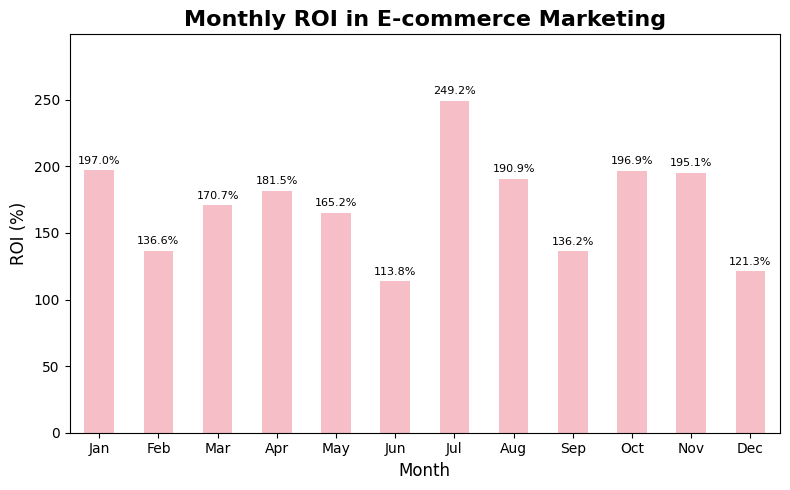

In [41]:
# Plot ROI over time
plt.figure(figsize=(8, 5))
sns.barplot(data=join_sales_marketing, x='Month', y='ROI(%)', color='#FFB6C1',width=0.5)

# Add data labels
for i, row in join_sales_marketing.iterrows():
    plt.text(i, row['ROI(%)'] + 5, f"{row['ROI(%)']:.1f}%", ha='center', fontsize=8)

# Plot formatting
plt.title('Monthly ROI in E-commerce Marketing', fontsize=16, fontweight='bold')
plt.ylabel('ROI (%)', fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylim(0, join_sales_marketing['ROI(%)'].max() + 50)
plt.tight_layout()
plt.show()

## Question 9
### Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?

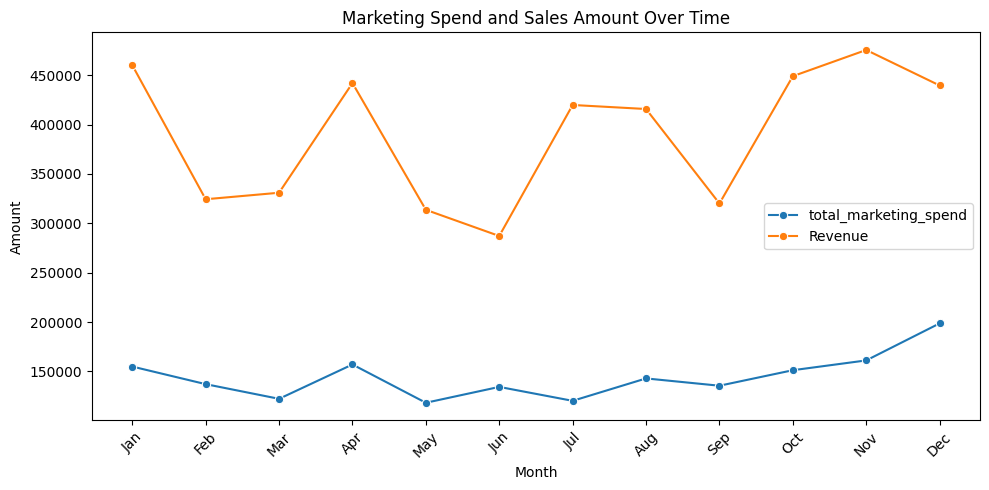

In [42]:
# Plotting line for offline, online marketing spend and total revenue
plt.figure(figsize=(10, 5))
sns.lineplot(data=join_sales_marketing, x='Month', y='total_marketing_spend', marker='o',  label='total_marketing_spend')
sns.lineplot(data=join_sales_marketing, x='Month', y='Revenue', marker='o',  label='Revenue')
# Enhance the plot
plt.title('Marketing Spend and Sales Amount Over Time')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Question 10
### Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)

RFM stands for:

Recency (R): How recently a customer made a purchase.

Frequency (F): How often the customer makes a purchase.

Monetary (M): How much money the customer has spent.

In [43]:
# Set reference date as one day after the last transaction date
reference_date = sales_data['Transaction_Date'].max() + pd.Timedelta(days=1)

# Group by CustomerID
rfm = sales_data.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (reference_date - x.max()).days,   # Recency
    'Transaction_ID': 'count',                                       # Frequency
    'Revenue': 'sum' ,                                               # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Create RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Function to assign segment
def assign_segment(rfm):
    if (rfm['R_Score'] >= 4) & (rfm['F_Score'] >= 4) & (rfm['M_Score'] >= 4):
        return 'Premium'
    elif (rfm['R_Score'] >= 3) & (rfm['F_Score'] >= 3):
        return 'Gold'
    elif (rfm['R_Score'] >= 2) & (rfm['F_Score'] >= 2):
        return 'Silver'
    else:
        return 'Standard'

# Apply segmentation
rfm['Segment'] = rfm.apply(assign_segment, axis=1)


segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer_Count']


segment_counts

,Segment,Customer_Count
0,Standard,500
1,Silver,382
2,Gold,307
3,Premium,279


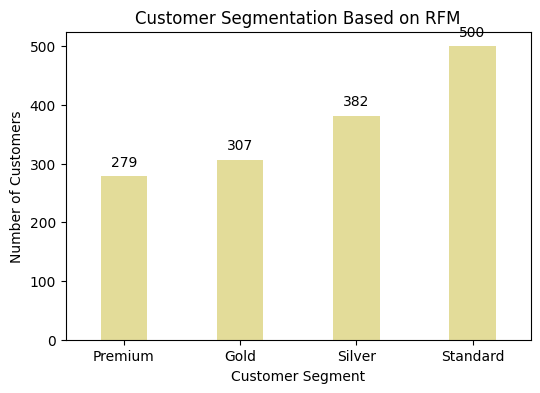

In [44]:
# Plot the number of customers in each segment
plt.figure(figsize=(6,4))
ax=sns.countplot(data=rfm, x='Segment', order=['Premium', 'Gold', 'Silver', 'Standard'], color='#F0E68C', width=0.4)
plt.title('Customer Segmentation Based on RFM')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
# SIMPLE: add labels
ax.bar_label(ax.containers[0], padding=5)
plt.show()


In [45]:
## Retention by customer segment
#  Aggregate Revenue per Customer
# customer_retention = sales_data[sales_data['retention_status']=='retained'].groupby('CustomerID')['retention_status'].count().reset_index()
customer_retention=sales_data[sales_data['retention_status'] == 'retained'].groupby('CustomerID').agg(retention_count=('retention_status', 'count'),total_revenue=('Revenue', 'sum')).reset_index()
customer_retention=customer_retention.rename(columns={'retention_status':'retention_count','Revenue':'Total_revenue'})
# Merge revenue with RFM segments
rfm_retention = rfm.merge(customer_retention, on='CustomerID', how='left')

# Since there are some customers who never purchased again - replace retention_count null with 0
rfm_retention['retention_count'] =rfm_retention['retention_count'].fillna(0)
rfm_retention['total_revenue'] =rfm_retention['total_revenue'].fillna(0)
rfm_retention

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,retention_count,total_revenue
0,12346,108,2,174.98174,3,1,1,311,Standard,0.0,0.00000
1,12347,60,60,12059.17780,4,5,5,455,Premium,29.0,2518.11400
2,12348,74,23,1501.92620,4,3,3,433,Gold,6.0,782.62238
3,12350,18,17,1183.71394,5,3,2,532,Gold,0.0,0.00000
4,12356,108,36,1753.45086,3,4,3,343,Gold,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,271,7,789.15360,1,1,2,112,Standard,0.0,0.00000
1464,18260,88,40,2573.65633,4,4,4,444,Premium,29.0,1534.76442
1465,18269,195,8,155.66092,2,2,1,221,Silver,1.0,18.13394
1466,18277,70,1,301.02000,4,1,1,411,Standard,0.0,0.00000


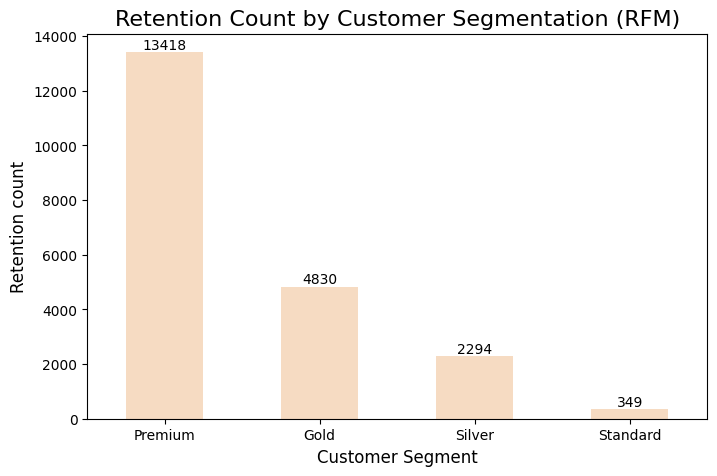

In [46]:
# Plot the number of customers in each segment
plt.figure(figsize=(8,5))
rfm_retention_count = rfm_retention.groupby('Segment')['retention_count'].sum().reset_index()
ax = sns.barplot(data=rfm_retention_count, x='Segment', y='retention_count', order=['Premium', 'Gold', 'Silver', 'Standard'], color='#FFDAB9', width=0.5)

# Set title and labels with light shade colors
plt.title('Retention Count by Customer Segmentation (RFM)', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Retention count', fontsize=12)

# Add labels to the bars
ax.bar_label(ax.containers[0])

# Display the plot
plt.show()


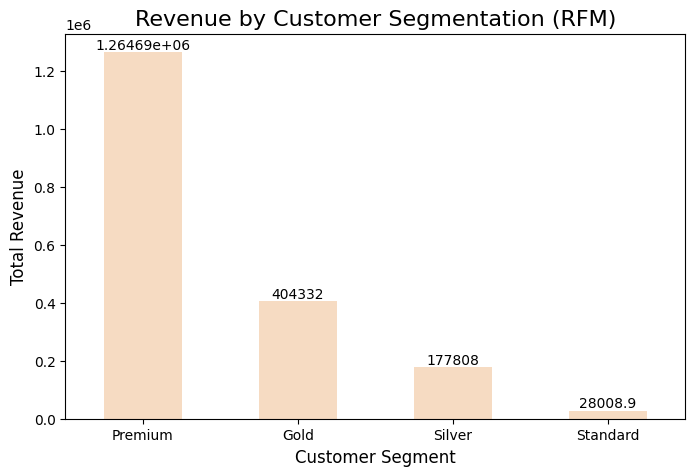

In [47]:
# Plot the number of customers in each segment
plt.figure(figsize=(8,5))
rfm_retention_revenue = rfm_retention.groupby('Segment')['total_revenue'].sum().reset_index()
ax = sns.barplot(data=rfm_retention_revenue, x='Segment', y='total_revenue', order=['Premium', 'Gold', 'Silver', 'Standard'], color='#FFDAB9', width=0.5)

# Set title and labels with light shade colors
plt.title('Revenue by Customer Segmentation (RFM)', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Add labels to the bars
ax.bar_label(ax.containers[0])

# Display the plot
plt.show()


## Question 11
### Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?

In [48]:
#  Aggregate Revenue per Customer
customer_revenue = sales_data.groupby('CustomerID')['Revenue'].sum().reset_index()

# Merge revenue with RFM segments
rfm_revenue = rfm.merge(customer_revenue, on='CustomerID', how='left')

rfm_revenue.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment,Revenue
0,12346,108,2,174.98174,3,1,1,311,Standard,174.98174
1,12347,60,60,12059.17780,4,5,5,455,Premium,12059.17780
2,12348,74,23,1501.92620,4,3,3,433,Gold,1501.92620
3,12350,18,17,1183.71394,5,3,2,532,Gold,1183.71394
4,12356,108,36,1753.45086,3,4,3,343,Gold,1753.45086


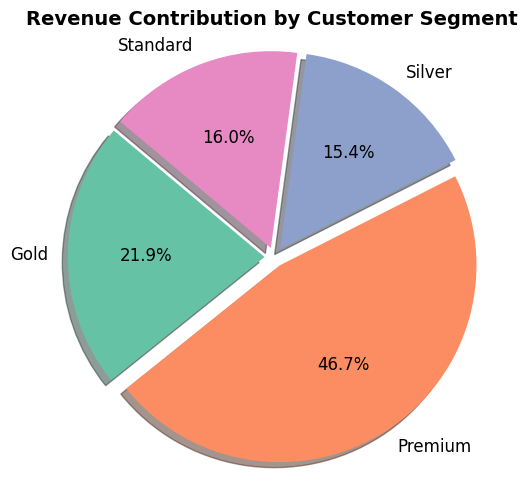

In [49]:
plt.figure(figsize=(5,5))

segment_revenue=rfm_revenue.groupby('Segment')['Revenue'].sum().reset_index()
# Define explode values to separate slices a bit
explode = [0.05] * len(segment_revenue)  # Slightly "pop out" each slice

# Define custom colors
colors = sns.color_palette("Set2", len(segment_revenue))  # Soft but vibrant colors

# Plot pie chart
plt.pie(segment_revenue['Revenue'],labels=segment_revenue['Segment'],autopct='%.1f%%',startangle=140,explode=explode,colors=colors,shadow=True,textprops={'fontsize': 12})

plt.title('Revenue Contribution by Customer Segment', fontsize=14, weight='bold')
plt.axis('equal')  # Ensures the pie is a perfect circle
plt.tight_layout()
plt.show()


## Question 12
### Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts? 

In [50]:
# We need to find cohort index
sales_data['cohort_index'] = (sales_data['transaction_month'] - sales_data['first_transaction_month']).apply(lambda x : x.n)

# calculate retention matrix
cohort_data = sales_data.groupby(['first_transaction_month', 'cohort_index'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='first_transaction_month', columns='cohort_index', values='CustomerID')
cohort_pivot

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
first_transaction_month,,,,,,,,,,,,
2019-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07,94.0,13.0,4.0,6.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,135.0,14.0,15.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Convert to retention % (normalized)
cohort_size = cohort_pivot[0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [52]:
cohort_size

first_transaction_month
2019-01    215.0
2019-02     96.0
2019-03    177.0
2019-04    163.0
2019-05    112.0
2019-06    137.0
2019-07     94.0
2019-08    135.0
2019-09     78.0
2019-10     87.0
2019-11     68.0
2019-12    106.0
Freq: M, Name: 0, dtype: float64

In [53]:
retention_matrix

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
first_transaction_month,,,,,,,,,,,,
2019-01,1.0,0.060465,0.111628,0.158140,0.106977,0.204651,0.162791,0.218605,0.106977,0.130233,0.093023,0.15814
2019-02,1.0,0.072917,0.093750,0.166667,0.177083,0.229167,0.197917,0.156250,0.125000,0.114583,0.166667,NaN
2019-03,1.0,0.101695,0.197740,0.141243,0.180791,0.186441,0.124294,0.124294,0.084746,0.107345,NaN,NaN
2019-04,1.0,0.085890,0.147239,0.147239,0.110429,0.092025,0.061350,0.098160,0.073620,NaN,NaN,NaN
2019-05,1.0,0.107143,0.080357,0.116071,0.089286,0.116071,0.125000,0.071429,NaN,NaN,NaN,NaN
2019-06,1.0,0.145985,0.160584,0.087591,0.080292,0.102190,0.080292,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.138298,0.042553,0.063830,0.117021,0.095745,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.103704,0.111111,0.074074,0.059259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.076923,0.038462,0.025641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


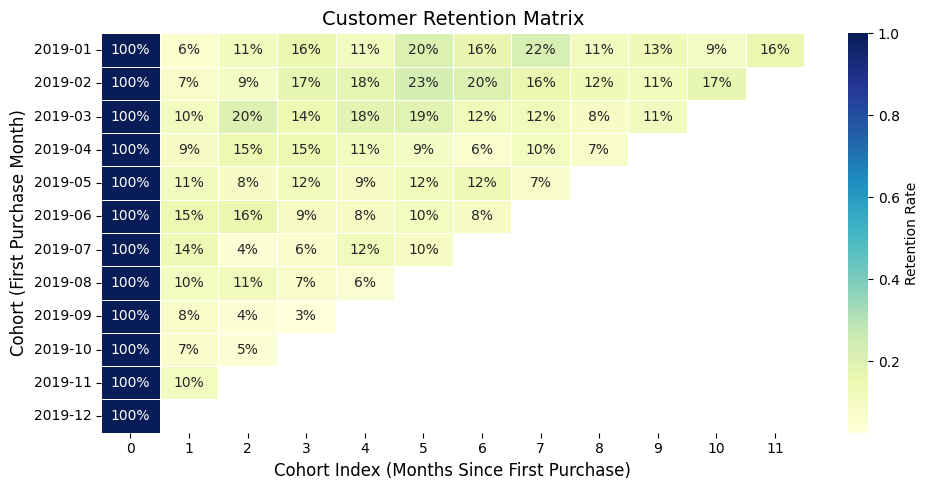

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Retention Rate'})

plt.title('Customer Retention Matrix',fontsize=14)
plt.xlabel('Cohort Index (Months Since First Purchase)',fontsize=12)
plt.ylabel('Cohort (First Purchase Month)',fontsize=12)
plt.tight_layout()
plt.show()


###  **Cohort Retention Analysis – Insights & Strategy**

From heatmap visualization, we can extract insights about **customer behavior** and **retention patterns** across cohorts. Here's a detailed breakdown:

---

###  **Key Observations**

1. **January 2019 Cohort stands out**:
   - Consistently higher retention across the months compared to other cohorts.
   - Peaks like 22% in month 7, and ends with 16% in month 11.
   - Indicates a strong onboarding or product-market fit at that time.

2. **Steep drop-off in retention in later cohorts**:
   - From **July 2019 onwards**, retention drops sharply after month 1.
   - For example:
     - **August 2019**: Only 6% retained by month 4.
     - **September 2019**: Retention falls to 3% by month 3.
   - This signals customer churn is high post initial engagement.

3. **Middle cohorts (Mar–Jun 2019)** show moderate performance:
   - Some months with decent retention (e.g., March at 20% in month 2), but not sustained like January.

4. **Lower cohort indices (months 1–3)** see a general drop:
   - Indicates poor **early product engagement** or **onboarding issues**.
   - Retention sharply drops after the first interaction — a critical phase.

---

###  **Strategies to Improve Retention for Weaker Cohorts**

1. **Improve Onboarding Experience**
   - Implement **personalized walkthroughs**, product tutorials, or proactive support.
   - Track activation metrics — are users achieving “success milestones” quickly?

2. **Re-Engagement Campaigns**
   - Use **email/SMS nudges**, push notifications, or promotions targeted at **inactive users**.
   - Offer limited-time discounts or value-added services to return.

3. **Customer Feedback Loop**
   - Run **surveys** or **exit interviews** for churned users.
   - Use NPS (Net Promoter Score) to capture dissatisfaction early.

4. **Targeted Communication**
   - Segment users based on usage patterns and tailor messages for each group.
   - Focus on **educational content**, **feature highlights**, or customer success stories.

5. **Loyalty & Rewards Programs**
   - Encourage second and third purchases with **points**, **cashback**, or **exclusive access**.

6. **Product Improvements**
   - Analyze product usage data to identify **pain points** or **friction areas**.
   - A/B test improvements for product flows with low engagement.

7. **Retention-based KPIs**
   - Make retention a **core business metric** for product, marketing, and customer success teams.
   - Reward teams for improving month-on-month cohort retention.



## Question 13
### Analyze the lifetime value (LTV) of customers acquired in different months. How can this insight inform acquisition and retention strategies?

#### Lifetime value (LTV)
![Alt Text](formulae/lifetime_value_formula.png)

In [55]:
# Grouping data by first transaction month to analyze customer cohorts
# For each cohort, calculate total revenue and number of unique customers acquired in that month
customer_ltv = sales_data.groupby('first_transaction_month').agg(
                                        total_cohort_revenue=('Revenue', 'sum'),       # Total revenue generated by customers acquired in that month
                                        unique_customers=('CustomerID', 'nunique') # Total number of unique customers acquired in that month
                                                    ).reset_index()

# Calculate Lifetime Value (LTV) as total revenue per customer for each cohort
customer_ltv['ltv'] = customer_ltv['total_cohort_revenue'] / customer_ltv['unique_customers']

#rename columns
customer_ltv.rename(columns={'first_transaction_month':'aquisition_month'}, inplace=True)

# Display the final DataFrame showing cohort-wise revenue, customer count, and LTV
customer_ltv['aquisition_month'] = customer_ltv['aquisition_month'].astype(str)


customer_ltv


,aquisition_month,total_cohort_revenue,unique_customers,ltv
0,2019-01,1.096457e+06,215,5099.799030
1,2019-02,5.460387e+05,96,5687.903318
2,2019-03,6.444266e+05,177,3640.827969
3,2019-04,4.693017e+05,163,2879.151335
4,2019-05,3.359037e+05,112,2999.140049
5,2019-06,2.706280e+05,137,1975.386564
6,2019-07,2.492768e+05,94,2651.881155
7,2019-08,2.609117e+05,135,1932.679013
8,2019-09,1.364367e+05,78,1749.188523
9,2019-10,2.518680e+05,87,2895.034452


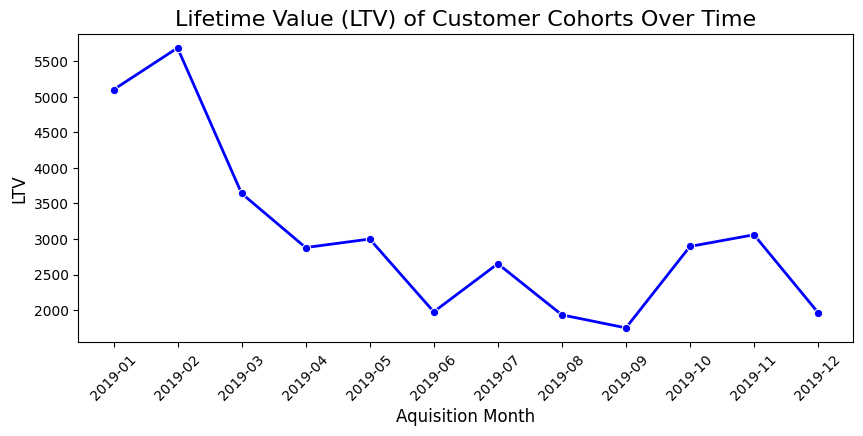

In [56]:

# Line chart for LTV trends
plt.figure(figsize=(10, 4))
sns.lineplot(data=customer_ltv, x='aquisition_month', y='ltv', marker='o', color='b', linewidth=2)
plt.title('Lifetime Value (LTV) of Customer Cohorts Over Time', fontsize=16)
plt.xlabel('Aquisition Month', fontsize=12)
plt.ylabel('LTV', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


Based on the **LTV trend line chart** you've shared, here are key **inferences** related to the question:

---

### 🔍 **Question:**
> Analyze the lifetime value (LTV) of customers acquired in different months. How can this insight inform acquisition and retention strategies?

---

### 📊 **Inferences from the Chart:**

#### 1. **Strong Early Cohorts (Jan–Feb 2019):**
- Customers acquired in **January and February 2019** show **very high LTV**, with a peak around February.
- This suggests that marketing campaigns or customer experiences during these months were highly effective.

✅ **Strategy Insight:**  
Replicate or analyze what worked during these months—channel mix, promotions, onboarding tactics—and consider applying similar strategies to future acquisition efforts.

---

#### 2. **Sharp Drop-Off After March:**
- There’s a **noticeable and steep decline** in LTV starting March 2019.
- The drop suggests either lower-value customer acquisition or poorer engagement/retention after initial sign-up.

⚠️ **Strategy Insight:**  
Investigate what changed after March—did the source of leads change? Was there a pricing change, a product update, or a service gap introduced?

---

#### 3. **Fluctuating Mid-Year Performance (Apr–Sep):**
- LTV remains inconsistent between **April and September**, bouncing up and down.
- Suggests lack of a stable retention/acquisition mechanism.

📌 **Strategy Insight:**  
Introduce better **customer segmentation**, personalize engagement, and focus on **early lifecycle nurturing** to stabilize performance.

---

#### 4. **Slight Recovery in October and November:**
- There’s a modest increase in LTV in **October and November**, indicating some improvement in customer value.
  
📈 **Strategy Insight:**  
Identify what actions or campaigns occurred during these months that might have positively influenced LTV. Consider refining and scaling those efforts.

---

#### 5. **December Dip:**
- December sees another decline, possibly due to seasonal effects or poor end-of-year campaigns.

📉 **Strategy Insight:**  
Plan **holiday season strategies** more effectively—consider customer reactivation campaigns, loyalty rewards, or holiday promotions.

---

### 📘 **Summary of Strategic Actions:**

| Observation | Suggested Action |
|-------------|------------------|
| High LTV in Jan–Feb | Analyze & replicate successful campaigns |
| Post-March decline | Investigate changes in acquisition or product |
| Mid-year fluctuations | Improve customer engagement, onboarding |
| Late-year improvement | Scale efforts that drove Q4 value |
| December dip | Plan retention for seasonality in advance |

---


## Question 14
### Do customers who use coupons have a different average transaction value compared to those who do not? Conduct a statistical test to validate this hypothesis. What implications does this have for the company’s discount and coupon strategies?

Since we have 3 categories in coupon status - clicked, used, not used , we will conduct below test
We will conduct a one way annova test to determine if the difference in average transaction values between coupon users and non-users is statistically significant.

Null Hypothesis (H₀):
There is no significant difference in average transaction value between coupon users and non-users.

Alternative Hypothesis (H₁):
There is a significant difference in average transaction value between the two groups.


First we need to conduct shapiro and levene test
| Test | Purpose | Applies To | Why it Matters |
|------|---------|------------|----------------|
| **Shapiro-Wilk Test** | Checks if data is **normally distributed** | Each group | ANOVA assumes normality |
| **Levene’s Test** | Checks if **variances are equal** across groups | All groups together | ANOVA assumes homogeneity of variance |

Text(0.5, 1.0, 'Average Order Value by Location')

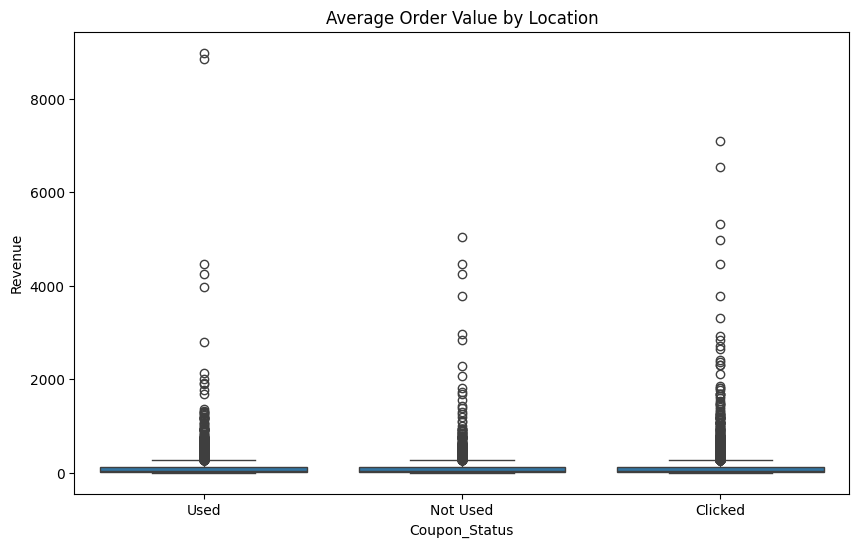

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Coupon_Status', y='Revenue', data=sales_data)
plt.title('Average Order Value by Location')


In [58]:
sales_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,first_transaction_date,first_transaction_month,transaction_month,retention_status,Retention_Period,GST,Discount_pct,final_discount,Revenue,cohort_index
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019-01-01,2019-01,2019-01,new,Low,0.10,10.0,10.0,158.6729,0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019-01-01,2019-01,2019-01,new,Low,0.10,10.0,10.0,158.6729,0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,2019-01-01,2019-01,2019-01,new,Low,0.10,10.0,10.0,8.5295,0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,2019-01-01,2019-01,2019-01,new,Low,0.18,10.0,0.0,99.5843,0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,2019-01-01,2019-01,2019-01,new,Low,0.18,10.0,10.0,24.0230,0


In [59]:
from scipy.stats import shapiro

# Drop rows with missing values in Coupon_Status or Revenue
sales_data = sales_data.dropna(subset=['Coupon_Status', 'Revenue'])

# Create revenue groups based on coupon status
used = sales_data[sales_data['Coupon_Status'] == 'Used']['Revenue'].dropna()
clicked = sales_data[sales_data['Coupon_Status'] == 'Clicked']['Revenue'].dropna()
not_used = sales_data[sales_data['Coupon_Status'] == 'Not Used']['Revenue'].dropna()

# Define function to run Shapiro test safely
def safe_shapiro(data, label):
    if len(data) >= 3 and len(data) <= 5000:
        stat, p = shapiro(data)
        print(f"{label}: W={stat:.4f}, p-value={p:.4f}")
    elif len(data) > 5000:
        # Sample if too large
        sample = data.sample(5000, random_state=42)
        stat, p = shapiro(sample)
        print(f"{label} (sampled 5000): W={stat:.4f}, p-value={p:.4f}")
    else:
        print(f"{label}: Not enough data for Shapiro test (n={len(data)})")

# Shapiro-Wilk Test for each group
print("Shapiro-Wilk Normality Test Results:")
safe_shapiro(used, "Used")
safe_shapiro(clicked, "Clicked")
safe_shapiro(not_used, "Not Used")

from scipy.stats import levene

# Levene's test
levene_stat, levene_p = levene(used, clicked, not_used)
print(f"Levene’s test — Statistic: {levene_stat:.3f}, p-value: {levene_p:.4f}")


Shapiro-Wilk Normality Test Results:
Used (sampled 5000): W=0.2545, p-value=0.0000
Clicked (sampled 5000): W=0.3570, p-value=0.0000
Not Used (sampled 5000): W=0.4067, p-value=0.0000
Levene’s test — Statistic: 0.955, p-value: 0.3849


In [60]:
from scipy.stats import f_oneway
import numpy as np


# Drop NaNs in each group (if any still exist)
used = used.dropna()
clicked = clicked.dropna()
not_used = not_used.dropna()

# Ensure each group has at least 3 observations and non-zero variance
if all(len(group) >= 3 and np.var(group, ddof=1) > 0 for group in [used, clicked, not_used]):
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(used, clicked, not_used)
    print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.4f}")
else:
    print("Insufficient or invalid data for ANOVA test (check group sizes or variance).")


F-statistic: 0.992, P-value: 0.3708



###  **One-Way ANOVA (Test for Differences in Means)**

- **Null Hypothesis (H₀)**: The **mean Revenue** is the **same** across all coupon status groups (Used, Clicked, Not Used).
- **Alternate Hypothesis (H₁)**: At least one group has a **different mean Revenue**.

✅ Since p-value = 0.3708 > 0.05 → **Fail to reject H₀** → **No significant difference in average revenue** among the groups.

---


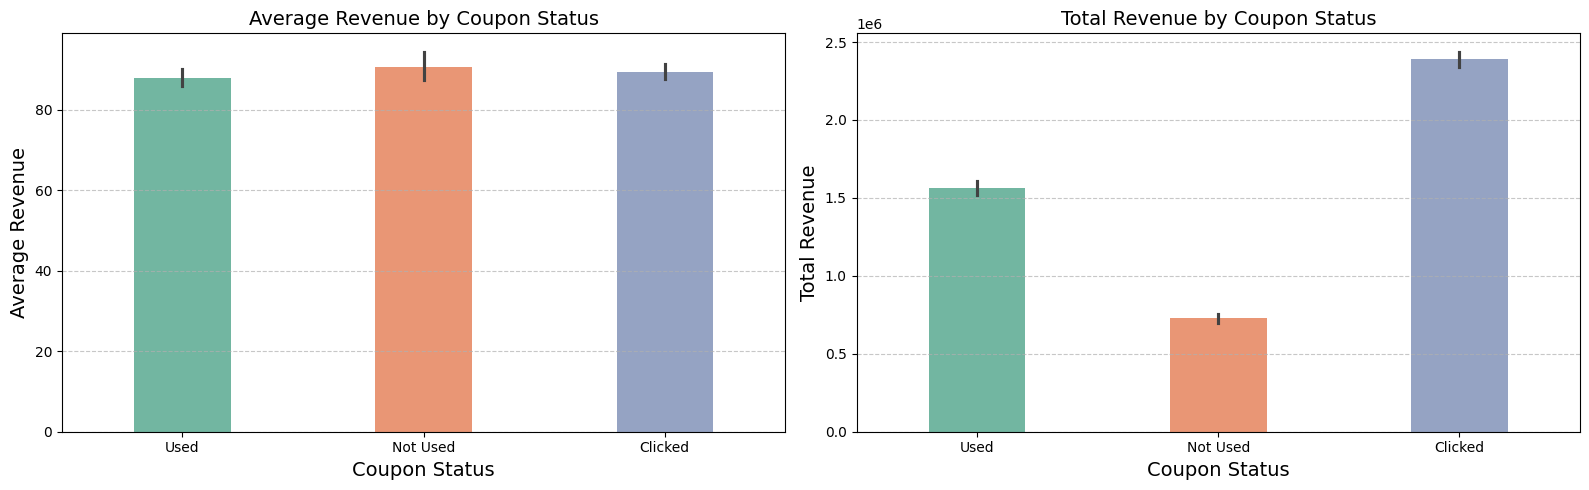

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Average Revenue by Coupon Status
sns.barplot(x='Coupon_Status', y='Revenue', data=sales_data, estimator='mean', palette='Set2', hue='Coupon_Status',ax=axes[0], width=0.4)
axes[0].set_title('Average Revenue by Coupon Status', fontsize=14)
axes[0].set_xlabel('Coupon Status', fontsize=14)
axes[0].set_ylabel('Average Revenue', fontsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Sum Revenue by Coupon Status
sns.barplot(x='Coupon_Status', y='Revenue', data=sales_data, estimator='sum', palette='Set2', hue='Coupon_Status',ax=axes[1], width=0.4)
axes[1].set_title('Total Revenue by Coupon Status', fontsize=14)
axes[1].set_xlabel('Coupon Status', fontsize=14)
axes[1].set_ylabel('Total Revenue', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to make space for the titles and labels
plt.tight_layout()

# Show the plot
plt.show()


## Question 15
### Give me approach for question Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)? Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?

### Delivery charges analysis

In [62]:
# Define custom intervals
# Create delivery charge tier
bins = [0, 50, 100, 150, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
sales_data['Delivery_Charge_Tier'] = pd.cut(sales_data['Delivery_Charges'], bins=bins, labels=labels)

sales_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,first_transaction_month,transaction_month,retention_status,Retention_Period,GST,Discount_pct,final_discount,Revenue,cohort_index,Delivery_Charge_Tier
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019-01,2019-01,new,Low,0.10,10.0,10.0,158.6729,0,Low
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,2019-01,2019-01,new,Low,0.10,10.0,10.0,158.6729,0,Low
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,2019-01,2019-01,new,Low,0.10,10.0,10.0,8.5295,0,Low
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,2019-01,2019-01,new,Low,0.18,10.0,0.0,99.5843,0,Low
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,2019-01,2019-01,new,Low,0.18,10.0,10.0,24.0230,0,Low


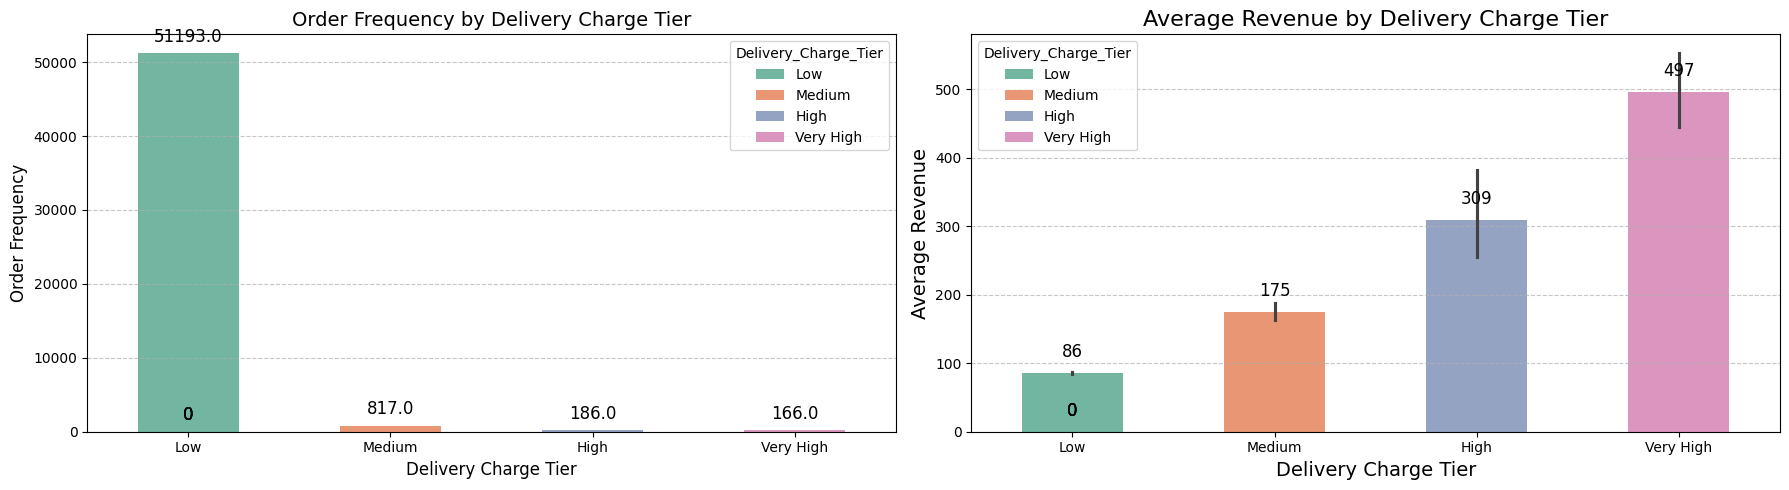

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'sales' DataFrame has already been created and includes the Delivery_Charge_Tier column

# Set up a 2x2 subplot to showcase different views
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# 1. Order Frequency by Delivery Charge Tier (Count of orders)
order_freq_plot = sns.countplot(x='Delivery_Charge_Tier', data=sales_data, palette='Set2', hue='Delivery_Charge_Tier', width=0.5, ax=axes[0])
axes[0].set_title('Order Frequency by Delivery Charge Tier', fontsize=14)
axes[0].set_xlabel('Delivery Charge Tier', fontsize=12)
axes[0].set_ylabel('Order Frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels for order frequency
for p in order_freq_plot.patches:
    order_freq_plot.annotate(f'{p.get_height()}', 
                             (p.get_x() + p.get_width() / 2., p.get_height()), 
                             xytext=(0, 12), 
                             textcoords='offset points', 
                             ha='center', va='center', fontsize=12, color='black')

# 2. Total Revenue by Delivery Charge Tier (Sum of Revenue)
revenue_plot = sns.barplot(x='Delivery_Charge_Tier', y='Revenue', data=sales_data, estimator='mean', hue='Delivery_Charge_Tier',width=0.5, palette='Set2', ax=axes[1])
axes[1].set_title('Average Revenue by Delivery Charge Tier', fontsize=16)
axes[1].set_xlabel('Delivery Charge Tier', fontsize=14)
axes[1].set_ylabel('Average Revenue', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add bar labels for total revenue
for p in revenue_plot.patches:
    revenue_plot.annotate(f'{p.get_height():,.0f}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          xytext=(0, 15), 
                          textcoords='offset points', 
                          ha='center', va='center', fontsize=12, color='black')

# Adjust layout
plt.tight_layout()
plt.show()


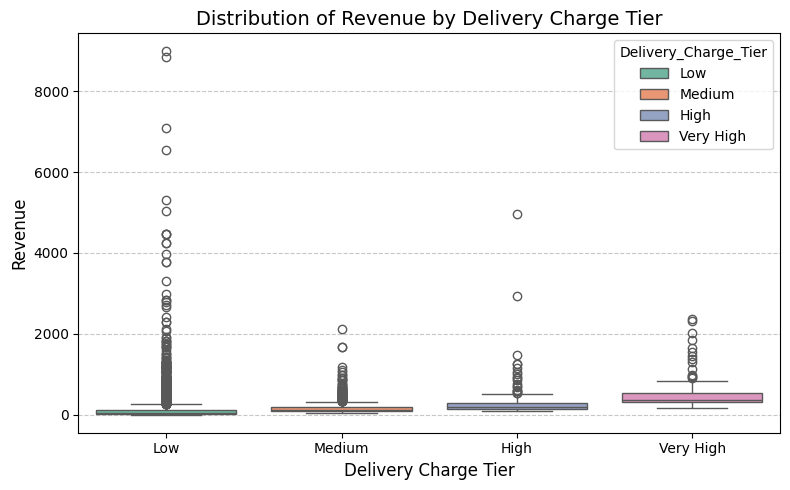

In [64]:
# Boxplot to show average revenue per order in each delivery charge tier
plt.figure(figsize=(8, 5))
sns.boxplot(x='Delivery_Charge_Tier', y='Revenue', data=sales_data, hue='Delivery_Charge_Tier' ,palette='Set2')
plt.title('Distribution of Revenue by Delivery Charge Tier', fontsize=14)
plt.xlabel('Delivery Charge Tier', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


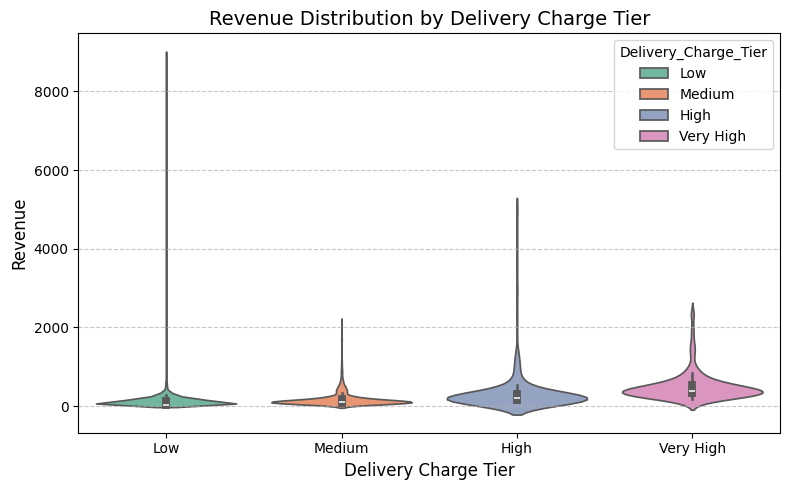

In [65]:
# Violin plot to visualize the distribution of revenue in each delivery charge tier
plt.figure(figsize=(8, 5))
sns.violinplot(x='Delivery_Charge_Tier', y='Revenue', data=sales_data, hue='Delivery_Charge_Tier', palette='Set2')
plt.title('Revenue Distribution by Delivery Charge Tier', fontsize=14)
plt.xlabel('Delivery Charge Tier', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Location analysis

In [66]:
## Merge sales data with customers data
sales_data=sales_data.merge(customer , on='CustomerID', how='left')
sales_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Retention_Period,GST,Discount_pct,final_discount,Revenue,cohort_index,Delivery_Charge_Tier,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Low,0.10,10.0,10.0,158.6729,0,Low,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,Low,0.10,10.0,10.0,158.6729,0,Low,M,Chicago,12
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,Low,0.10,10.0,10.0,8.5295,0,Low,M,Chicago,12
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,Low,0.18,10.0,0.0,99.5843,0,Low,M,Chicago,12
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,Low,0.18,10.0,10.0,24.0230,0,Low,M,Chicago,12


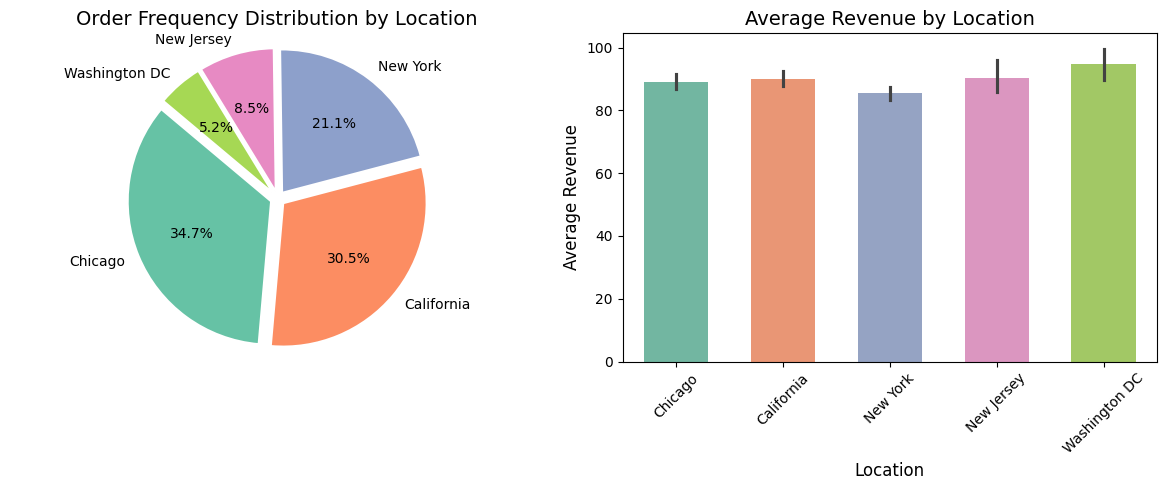

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data: count of orders per Delivery Charge Tier
order_counts = sales_data['Location'].value_counts()

# Set up a 1x2 layout: Pie chart and Bar chart side-by-side (optional)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# 1. Pie Chart
explode = [0.05] * len(order_counts)  # Slightly separate each slice
colors = sns.color_palette('Set2', n_colors=len(order_counts))

axes[0].pie(order_counts,labels=order_counts.index,autopct='%1.1f%%',startangle=140,explode=explode,colors=colors,textprops={'fontsize': 10},wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})  # Adds border

axes[0].set_title('Order Frequency Distribution by Location', fontsize=14)
axes[0].axis('equal')  # Ensures the pie is circular


# 2. Bar Chart (Optional for comparison)
sns.barplot(x='Location',y='Revenue', data=sales_data, palette='Set2',hue='Location', ax=axes[1],width=0.6)
axes[1].set_title('Average Revenue by Location', fontsize=14)
axes[1].set_xlabel('Location', fontsize=12)
axes[1].set_ylabel('Average Revenue', fontsize=12)
axes[1].tick_params(axis='x', labelrotation=45)


plt.tight_layout()
plt.show()


## Genderwise purchase Analysis

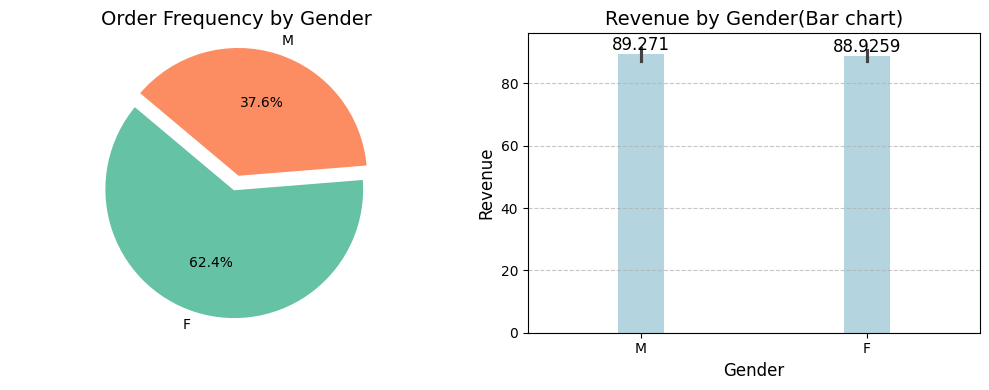

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the data: count of orders per Delivery Charge Tier
order_counts = sales_data['Gender'].value_counts()

# Set up a 1x2 layout: Pie chart and Bar chart side-by-side (optional)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 1. Pie Chart
explode = [0.05] * len(order_counts)  # Slightly separate each slice
colors = sns.color_palette('Set2', n_colors=len(order_counts))

axes[0].pie(order_counts,labels=order_counts.index,autopct='%1.1f%%',startangle=140,explode=explode,colors=colors,textprops={'fontsize': 10},wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})  # Adds border

axes[0].set_title('Order Frequency by Gender', fontsize=14)
axes[0].axis('equal')  # Ensures the pie is circular

# 2. Bar Chart (Optional for comparison)
bar_plot= sns.barplot(x='Gender', y='Revenue',data=sales_data, estimator='mean',color='lightblue',width=0.2, ax=axes[1])
axes[1].set_title('Revenue by Gender(Bar chart)', fontsize=14)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Revenue', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# Add bar labels
axes[1].bar_label(bar_plot.containers[0], fontsize=12, color='black')

plt.tight_layout()
plt.show()


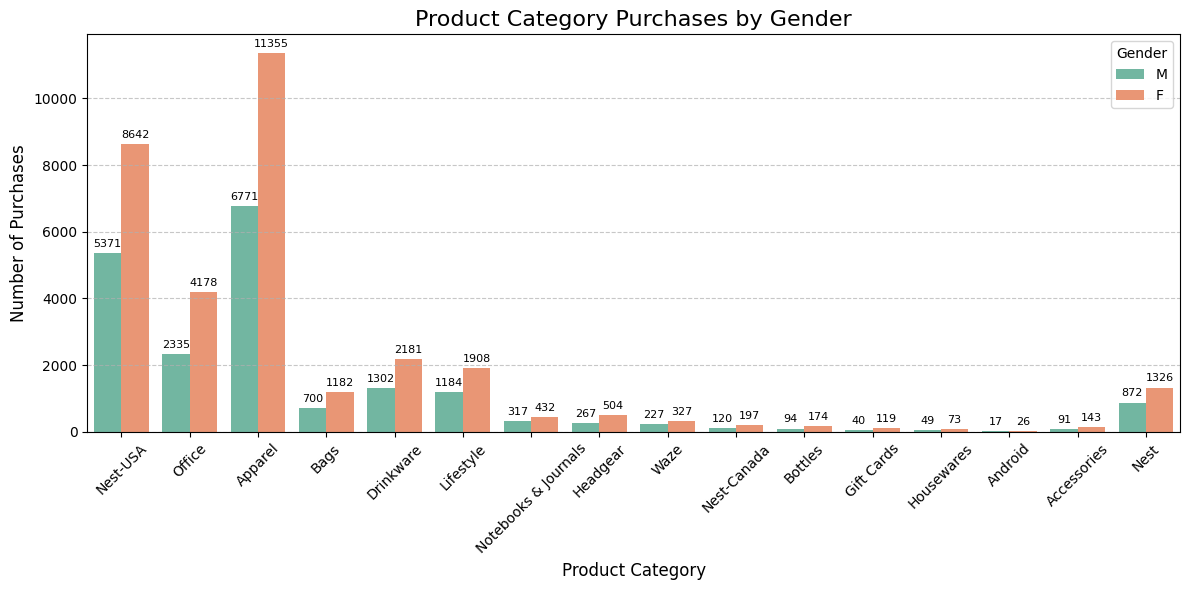

In [69]:
# Set plot size
plt.figure(figsize=(12, 6))
# Grouped bar plot
sns.countplot(data=sales_data, x='Product_Category', hue='Gender', palette='Set2')

# Labels and title
plt.title('Product Category Purchases by Gender', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Purchases', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Optional: Add bar labels
# Get current Axes
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fontsize=8, padding=3)

plt.tight_layout()
plt.show()


## Question 16
### Does customer tenure impact purchase frequency? Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?


In [70]:
# Create Tenure band based on Tenure months
bins = [0, 6, 12, 24, 36, 60]
labels = ['<6M', '6-12M', '1-2Y', '2-3Y', '3-5Y']
sales_data['Tenure_Band'] = pd.cut(sales_data['Tenure_Months'], bins=bins, labels=labels)


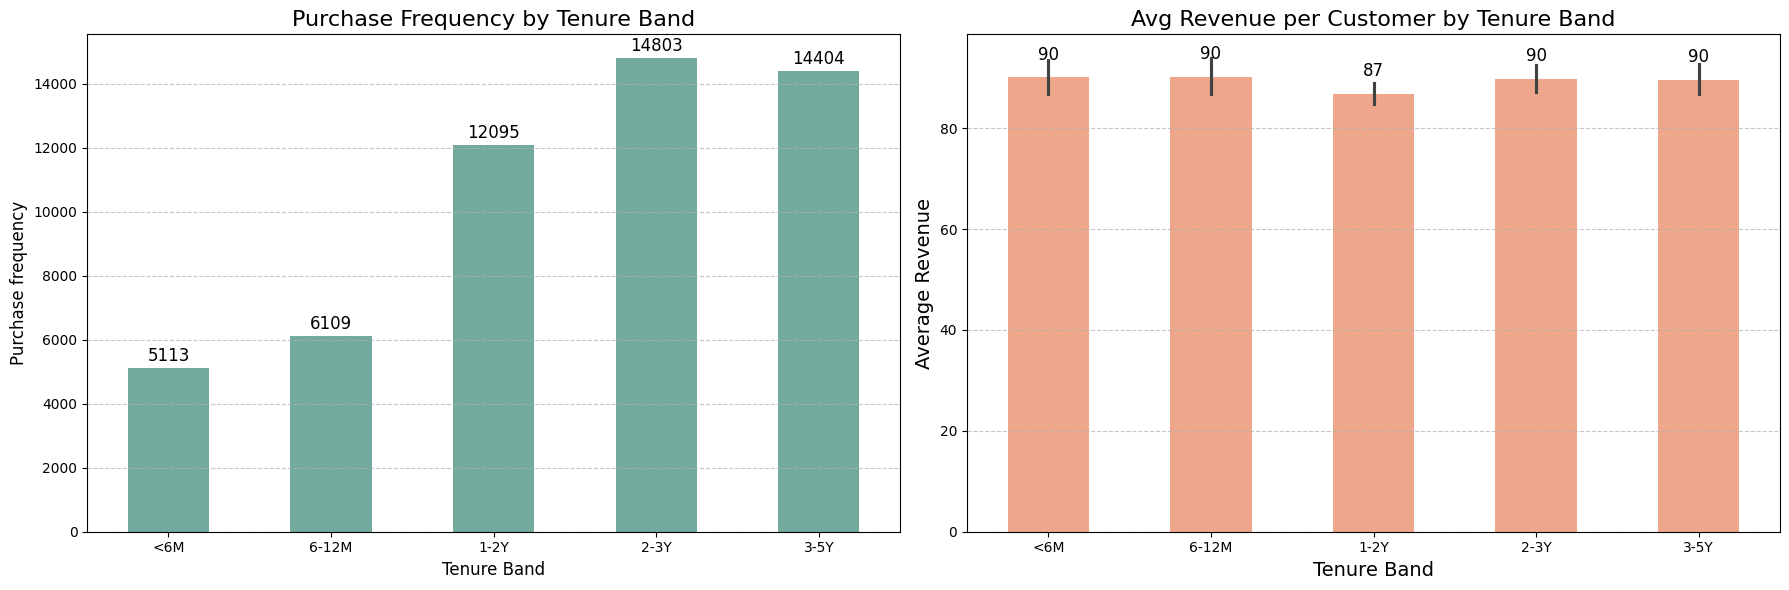

In [71]:
# Set up a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# 1. Order Frequency by Tenure Band (Count of orders)
order_plot = sns.countplot(x='Tenure_Band', data=sales_data, ax=axes[0], color='#69b3a2',width=0.5)
axes[0].set_title('Purchase Frequency by Tenure Band', fontsize=16)
axes[0].set_xlabel('Tenure Band', fontsize=12)
axes[0].set_ylabel('Purchase frequency', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].bar_label(order_plot.containers[0], padding=2, fontsize=12, color='black')


revenue_plot = sns.barplot(x='Tenure_Band', y='Revenue', data=sales_data, ax=axes[1], color='#FFA07A',width=0.5)
axes[1].set_title('Avg Revenue per Customer by Tenure Band', fontsize=16)
axes[1].set_xlabel('Tenure Band', fontsize=14)
axes[1].set_ylabel('Average Revenue', fontsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].bar_label(revenue_plot.containers[0], padding=10, fontsize=12, color='black', fmt='{:,.0f}')

plt.tight_layout()
plt.show()

### **Inferences from the Graphs**

#### 1. **Purchase Frequency vs. Tenure**

* **Clear upward trend**: As tenure increases, purchase frequency increases significantly.

  * `<6M` customers: \~5,113 purchases
  * `2–3Y` and `3–5Y`: \~14,000+ purchases
* **Interpretation**: Longer-tenured customers are much more likely to make frequent purchases, indicating increasing engagement over time.

#### 2. **Average Revenue per Customer**

* Revenue per customer remains **fairly stable across tenure bands** (\~87–90 units).
* This suggests that:

  * Customers consistently spend similar amounts per transaction regardless of tenure.
  * The higher revenue from longer-tenured customers is driven more by **frequency**, not spending per purchase.

---

### **Insights and Recommendations**

#### 1. **Focus on Early Engagement (<12M customers)**

* Since early-tenure customers purchase less frequently, design onboarding campaigns that:

  * Offer loyalty points or discounts for frequent buying.
  * Use personalized product recommendations early in the lifecycle.
  * Trigger retention nudges (email/app) after inactivity.

#### 2. **Build Retention Programs for Growth**

* Because tenure correlates with higher purchase frequency:

  * Invest in **loyalty programs** that reward long-term engagement.
  * Track customer tenure and segment communications (e.g., anniversary rewards).
  * Develop nurturing journeys that evolve as tenure increases.

#### 3. **Monitor Plateau or Drop-off**

* If any tenure band beyond 5 years (not shown here) flattens or drops in purchase frequency, investigate:

  * Are customers getting disengaged?
  * Could targeted reactivation or feedback campaigns help?

#### 4. **Use Tenure Band as a Key Customer Segment**

* For marketing and analytics, incorporate `Tenure_Band` into segmentation.
* Tailor promotions, upselling strategies, and support interactions based on this metric.

---



## Question 17
### Analyze the relationship between delivery charges and order behavior. Are there opportunities to optimize delivery pricing to increase order quantities or revenue?

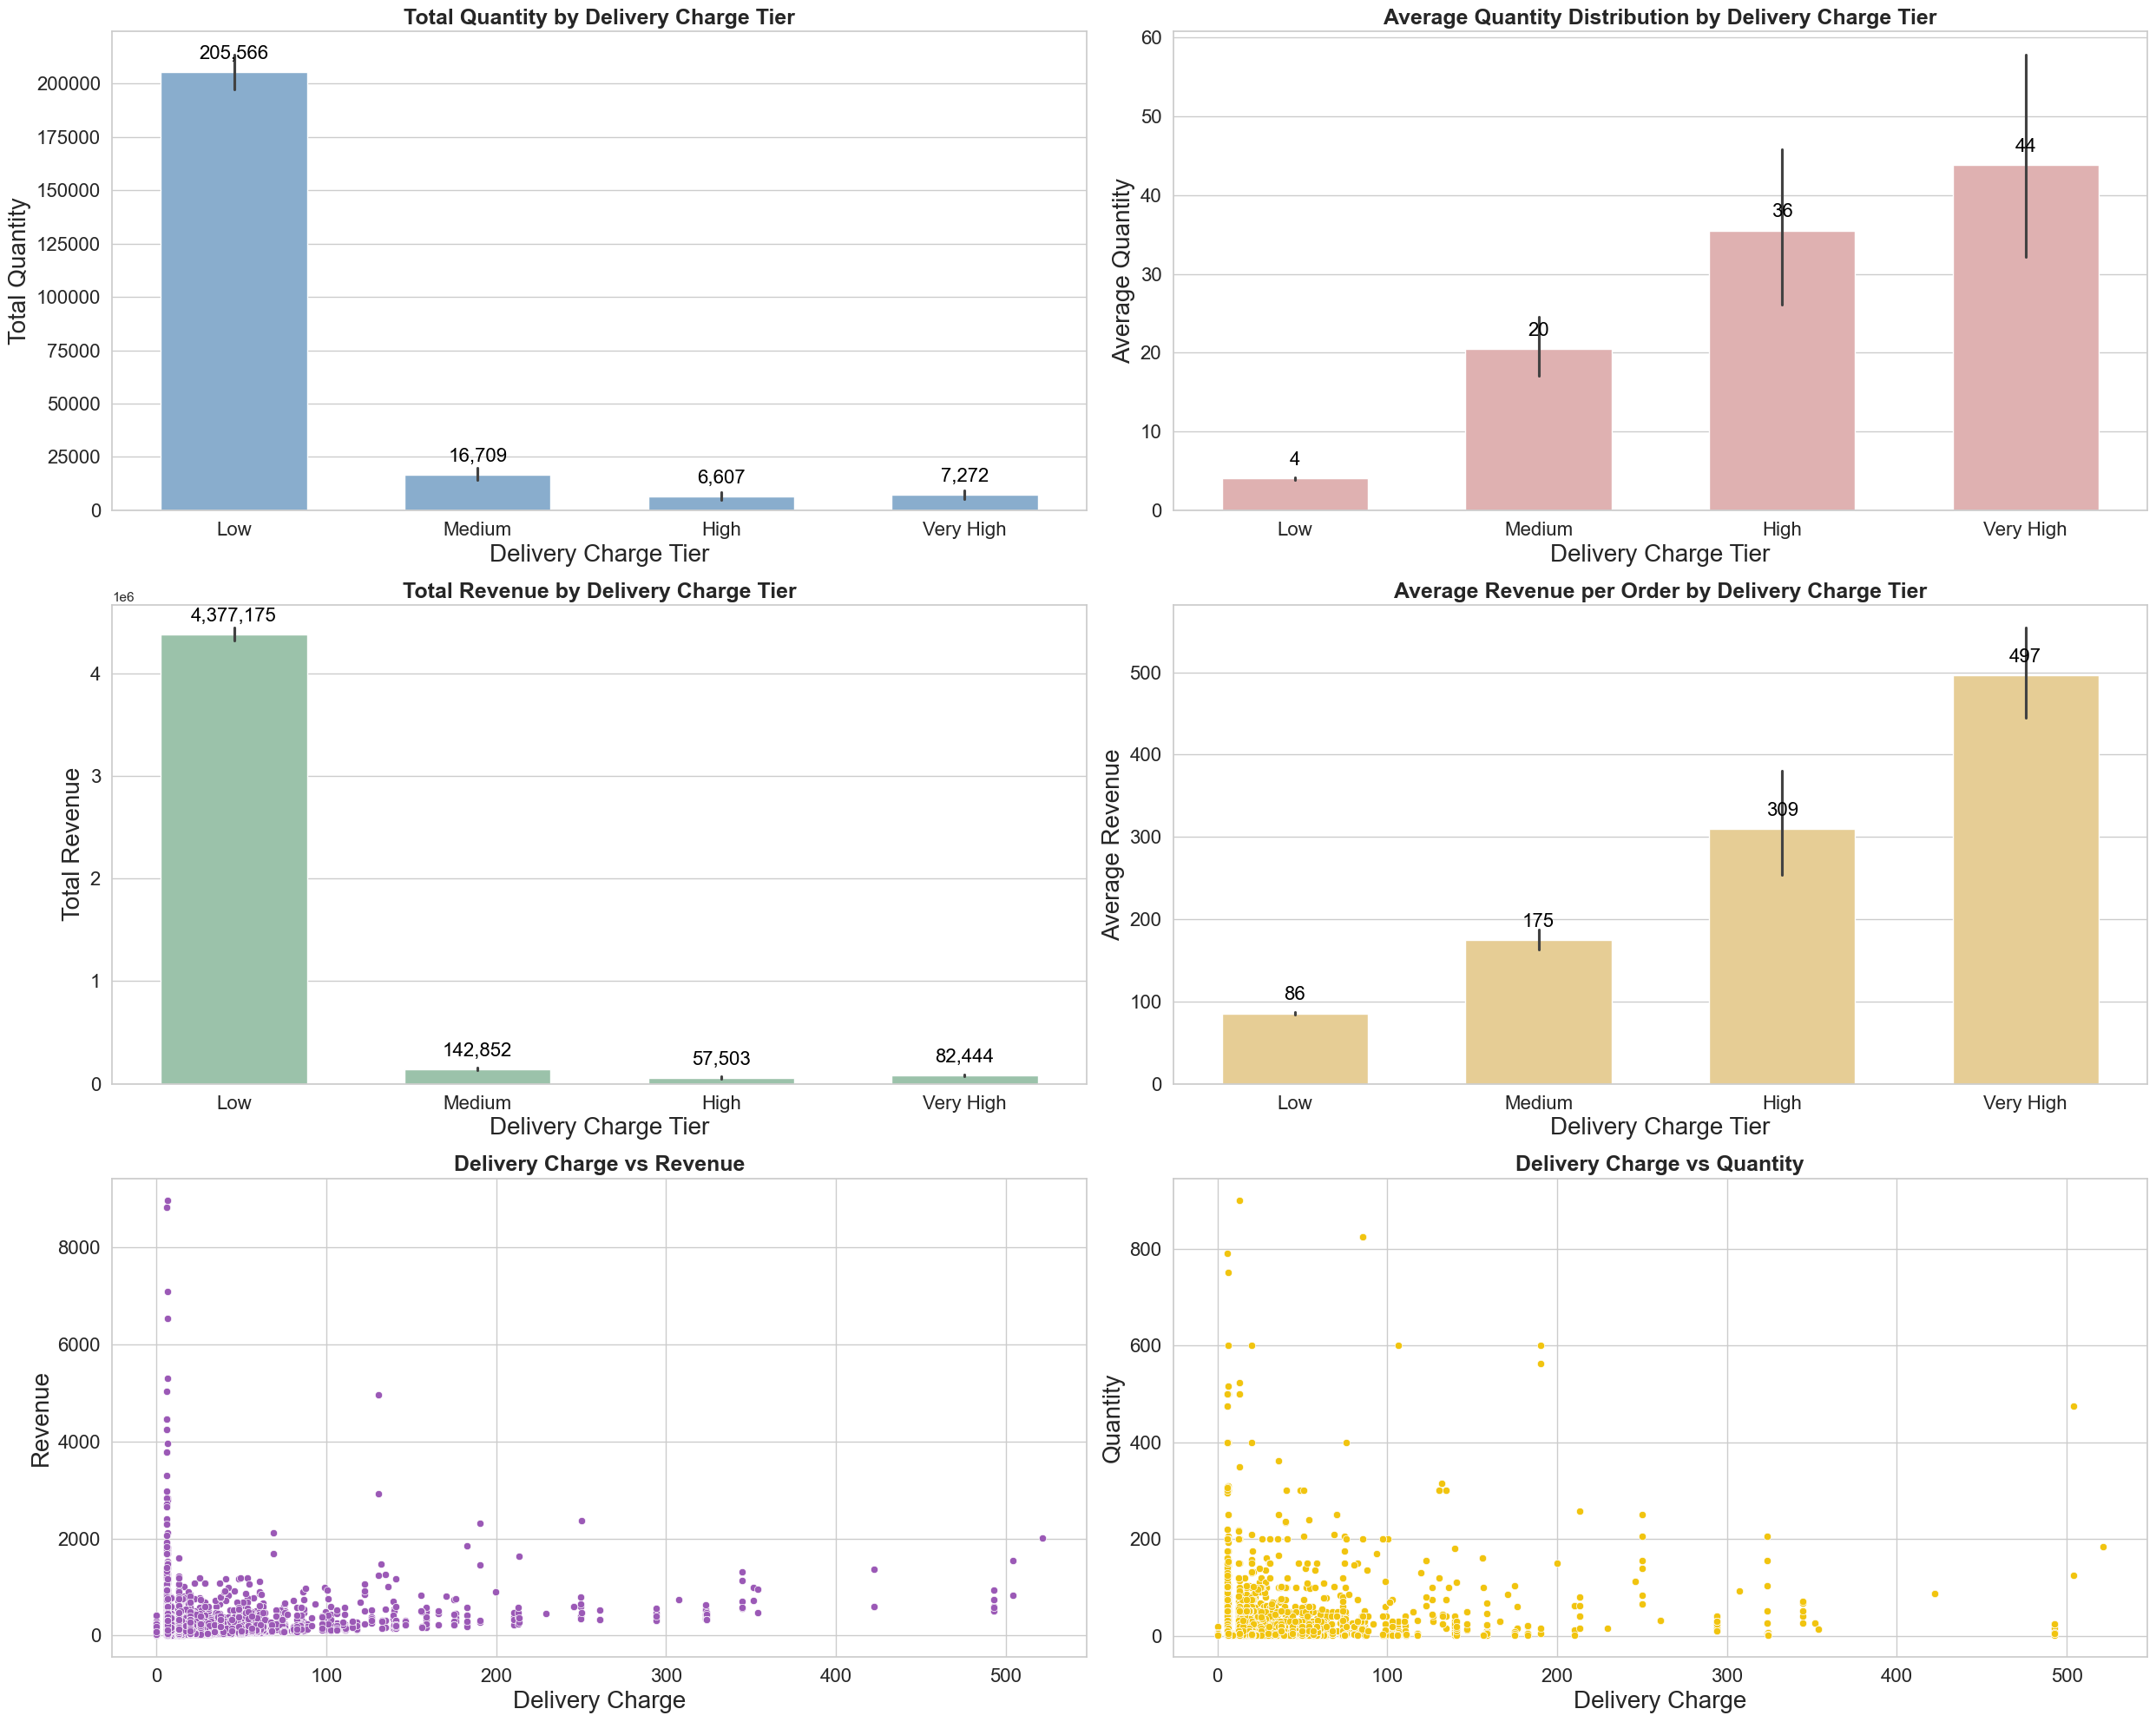

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set common style
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(25, 20))
axes = axes.flatten()  # Flatten to easily index axes

# Define font sizes and color shades
title_font = {'fontsize': 18, 'fontweight': 'bold'}
label_font = {'fontsize': 20}
axis_font = {'fontsize': 14}
tick_font = {'fontsize': 16}

# 1. Order Frequency by Delivery Charge Tier
plot1=sns.barplot(x='Delivery_Charge_Tier', y='Quantity', data=sales_data, estimator='sum', color='#7DAED9', width=0.6, ax=axes[0])
axes[0].set_title('Total Quantity by Delivery Charge Tier', **title_font)
axes[0].set_xlabel('Delivery Charge Tier', **label_font)
axes[0].set_ylabel('Total Quantity', **label_font)
axes[0].tick_params(axis='both', labelsize=tick_font['fontsize'])
axes[0].bar_label(plot1.containers[0], padding=8, fontsize=16, color='black', fmt='{:,.0f}')

# 2. Average quantity by Delivery Charge Tier (Boxplot)
plot2=sns.barplot(x='Delivery_Charge_Tier', y='Quantity', data=sales_data, estimator='mean', color='#E7A9A9', ax=axes[1], width=0.6,)
axes[1].set_title('Average Quantity Distribution by Delivery Charge Tier', **title_font)
axes[1].set_xlabel('Delivery Charge Tier', **label_font)
axes[1].set_ylabel('Average Quantity', **label_font)
axes[1].tick_params(axis='both', labelsize=tick_font['fontsize'])
axes[1].bar_label(plot2.containers[0], padding=8, fontsize=16, color='black', fmt='{:,.0f}')

# 3. Total Revenue by Delivery Charge Tier
plot3=sns.barplot(x='Delivery_Charge_Tier', y='Revenue', data=sales_data, estimator='sum', color='#94C9A9', width=0.6, ax=axes[2])
axes[2].set_title('Total Revenue by Delivery Charge Tier', **title_font)
axes[2].set_xlabel('Delivery Charge Tier', **label_font)
axes[2].set_ylabel('Total Revenue', **label_font)
axes[2].tick_params(axis='both', labelsize=tick_font['fontsize'])
axes[2].bar_label(plot3.containers[0], padding=8, fontsize=16, color='black', fmt='{:,.0f}')

# 4. Average Revenue per Order by Delivery Charge Tier
plot4=sns.barplot(x='Delivery_Charge_Tier', y='Revenue', data=sales_data, estimator='mean', color='#F3D288', width=0.6, ax=axes[3])
axes[3].set_title('Average Revenue per Order by Delivery Charge Tier', **title_font)
axes[3].set_xlabel('Delivery Charge Tier', **label_font)
axes[3].set_ylabel('Average Revenue', **label_font)
axes[3].tick_params(axis='both', labelsize=tick_font['fontsize'])
axes[3].bar_label(plot4.containers[0], padding=8, fontsize=16, color='black', fmt='{:,.0f}')


# 5. Delivery Charge vs Revenue (Scatter plot)
sns.scatterplot(x='Delivery_Charges', y='Revenue', data=sales_data, color='#9B59B6', ax=axes[4])
axes[4].set_title('Delivery Charge vs Revenue', **title_font)
axes[4].set_xlabel('Delivery Charge', **label_font)
axes[4].set_ylabel('Revenue', **label_font)
axes[4].tick_params(axis='both', labelsize=tick_font['fontsize'])

# 6. Delivery Charge vs Quantity (Scatter plot)
sns.scatterplot(x='Delivery_Charges', y='Quantity', data=sales_data, color='#F1C40F', ax=axes[5])
axes[5].set_title('Delivery Charge vs Quantity', **title_font)
axes[5].set_xlabel('Delivery Charge', **label_font)
axes[5].set_ylabel('Quantity', **label_font)
axes[5].tick_params(axis='both', labelsize=tick_font['fontsize'])
# Adjust layout
plt.tight_layout()
plt.show()


## Question 18
### Evaluate how taxes and delivery charges influence customer spending behavior. Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?



<Axes: xlabel='GST', ylabel='Count'>

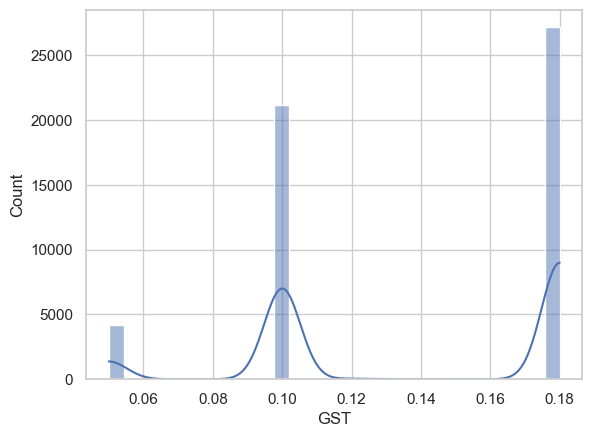

In [73]:
sns.histplot(sales_data['GST'], bins=30, kde=True)

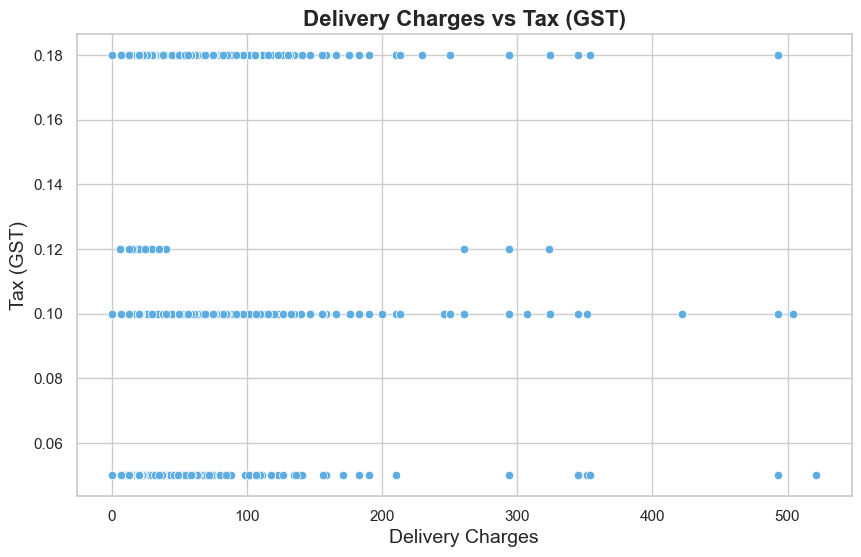

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery_Charges', y='GST', data=sales_data, color='#5DADE2')
plt.title('Delivery Charges vs Tax (GST)', fontsize=16, weight='bold')
plt.xlabel('Delivery Charges', fontsize=14)
plt.ylabel('Tax (GST)', fontsize=14)
plt.show()


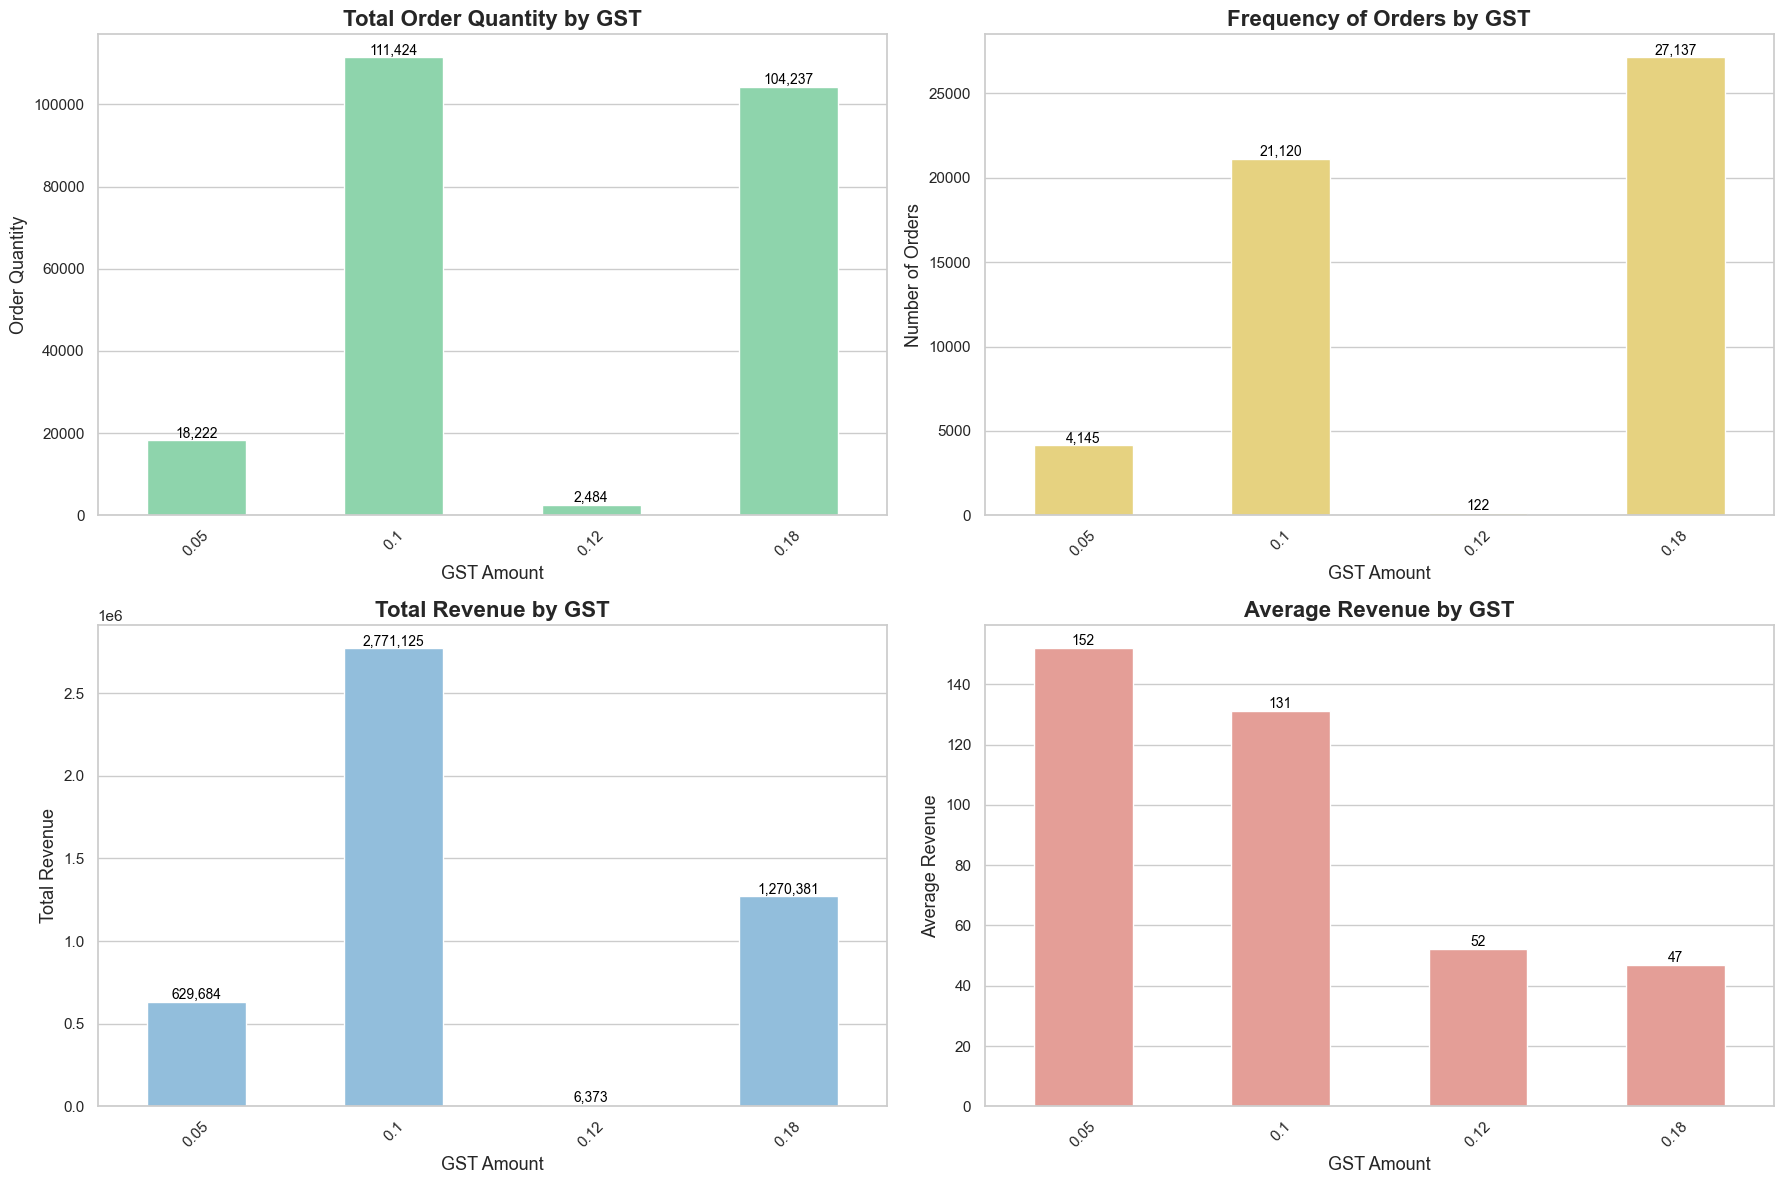

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group once by GST
grouped = sales_data.groupby('GST').agg({
    'Revenue': ['mean', 'sum'],
    'Quantity': 'sum',
    'GST': 'count'  # Count of rows as frequency
}).reset_index()

# Flatten MultiIndex columns
grouped.columns = ['GST', 'Avg_Revenue', 'Total_Revenue', 'Total_Quantity', 'Order_Frequency']

# Convert GST to string for plotting
grouped['GST_str'] = grouped['GST'].astype(str)

# Set up 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Total Quantity
ax1 = sns.barplot(x='GST_str', y='Total_Quantity', data=grouped, color='#82E0AA', width=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Total Order Quantity by GST', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('GST Amount', fontsize=13)
axes[0, 0].set_ylabel('Order Quantity', fontsize=13)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].bar_label(ax1.containers[0], fontsize=10, color='black', fmt='{:,.0f}')

# Plot 2: Frequency
ax2 = sns.barplot(x='GST_str', y='Order_Frequency', data=grouped, color='#F7DC6F', width=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Frequency of Orders by GST', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('GST Amount', fontsize=13)
axes[0, 1].set_ylabel('Number of Orders', fontsize=13)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].bar_label(ax2.containers[0], fontsize=10, color='black', fmt='{:,.0f}')

# Plot 3: Total Revenue
ax3 = sns.barplot(x='GST_str', y='Total_Revenue', data=grouped, color='#85C1E9', width=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Total Revenue by GST', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('GST Amount', fontsize=13)
axes[1, 0].set_ylabel('Total Revenue', fontsize=13)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].bar_label(ax3.containers[0], fontsize=10, color='black', fmt='{:,.0f}')

# Plot 4: Average Revenue
ax4 = sns.barplot(x='GST_str', y='Avg_Revenue', data=grouped, color='#F1948A', width=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Average Revenue by GST', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('GST Amount', fontsize=13)
axes[1, 1].set_ylabel('Average Revenue', fontsize=13)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].bar_label(ax4.containers[0], fontsize=10, color='black', fmt='{:,.0f}')
# plt.savefig("GST_analysis.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

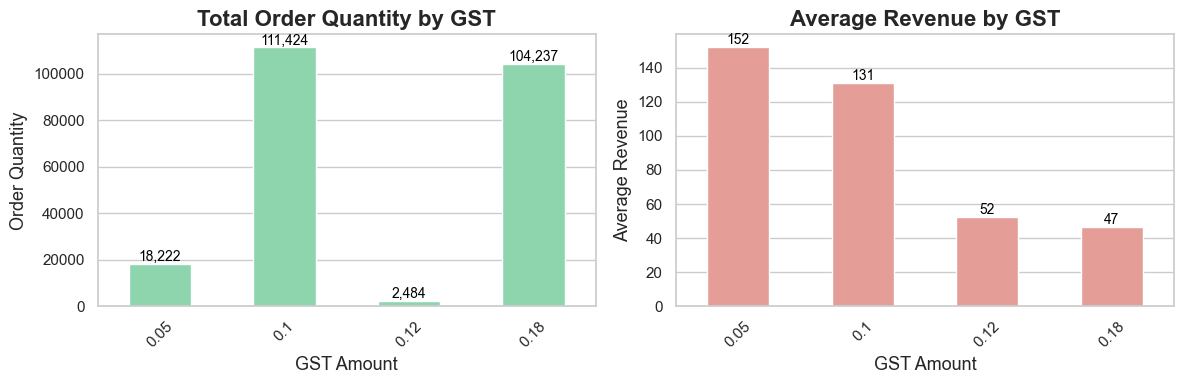

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group once by GST
grouped = sales_data.groupby('GST').agg({
    'Revenue': ['mean', 'sum'],
    'Quantity': 'sum',
    'GST': 'count'  # Count of rows as frequency
}).reset_index()

# Flatten MultiIndex columns
grouped.columns = ['GST', 'Avg_Revenue', 'Total_Revenue', 'Total_Quantity', 'Order_Frequency']

# Convert GST to string for plotting
grouped['GST_str'] = grouped['GST'].astype(str)

# Set up 2x2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Total Quantity
ax1 = sns.barplot(x='GST_str', y='Total_Quantity', data=grouped, color='#82E0AA', width=0.5, ax=axes[0])
axes[0].set_title('Total Order Quantity by GST', fontsize=16, fontweight='bold')
axes[0].set_xlabel('GST Amount', fontsize=13)
axes[0].set_ylabel('Order Quantity', fontsize=13)
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(ax1.containers[0], fontsize=10, color='black', fmt='{:,.0f}')

# Plot 2: Average Revenue
ax4 = sns.barplot(x='GST_str', y='Avg_Revenue', data=grouped, color='#F1948A', width=0.5, ax=axes[1])
axes[1].set_title('Average Revenue by GST', fontsize=16, fontweight='bold')
axes[1].set_xlabel('GST Amount', fontsize=13)
axes[1].set_ylabel('Average Revenue', fontsize=13)
axes[1].tick_params(axis='x', rotation=45)
axes[1].bar_label(ax4.containers[0], fontsize=10, color='black', fmt='{:,.0f}')
# plt.savefig("GST_analysis.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by product category and calculate average GST
avg_tax_by_category = sales_data.groupby('Product_Category')['GST'].mean().reset_index().sort_values('GST')

# # Plot
# plt.figure(figsize=(10, 5))
# ax1 = sns.barplot(y='GST', x='Product_Category', data=avg_tax_by_category, color='#76D7C4', width=0.4)

# plt.title('Average GST by Product Category', fontsize=16, fontweight='bold')
# plt.xlabel('Average GST', fontsize=13)
# plt.ylabel('Product Category', fontsize=13)
# plt.xticks(rotation=45, fontsize=11)
# plt.yticks(fontsize=11)

# # Add bar labels
# plt.bar_label(ax1.containers[0], fmt='%.2f', fontsize=10, color='black', padding=3)
# plt.tight_layout()
# plt.show()
avg_tax_by_category.T

,6,7,4,10,13,1,0,14,11,12,8,2,5,3,9,15
Product_Category,Gift Cards,Headgear,Bottles,Nest,Notebooks & Journals,Android,Accessories,Office,Nest-Canada,Nest-USA,Housewares,Apparel,Drinkware,Bags,Lifestyle,Waze
GST,0.05,0.05,0.05,0.05,0.05,0.1,0.1,0.1,0.1,0.1,0.12,0.18,0.18,0.18,0.18,0.18


Based on the provided visualizations, here are **concise inferences** that evaluate how **GST (taxes)** and **delivery charges** influence customer spending behavior, along with pricing strategy opportunities:

---

### 📌 **1. Impact of GST on Order Behavior**

**a. Total Quantity & Frequency (Top-left & Top-right plots)**

* **GST 0.1** and **0.18** dominate both in **order quantity** and **order frequency**, indicating customers are still willing to buy even with higher tax (0.18).
* **GST 0.05** shows low order frequency and quantity—possibly limited product range or lower perceived value.

✅ **Inference:** Customers tolerate **higher GST (0.18)** if products are valuable or essential. Low GST doesn’t always mean higher sales.

---

### 📌 **2. Revenue Trends Across GST Rates**

**a. Total Revenue (Bottom-left plot)**

* **GST 0.1** yields the **highest total revenue**, followed by **0.18**.
* **GST 0.12** contributes minimally despite being mid-range, suggesting product-category or pricing mismatch.

**b. Average Revenue (Bottom-right plot)**

* **GST 0.05** and **0.1** have the **highest average revenue per order**, indicating **larger order values** or **premium product selection**.

✅ **Inference:** Medium GST (0.1) is the sweet spot for both frequency and revenue.
❗ **Opportunity:** Reposition or bundle products in the **0.12 GST slab**—currently underperforming.

---

### 📌 **3. Influence of Delivery Charges on Spending**

**(Top scatter plot: Delivery Charges vs GST)**

* **No strong correlation** between delivery charge and GST.
* Most orders cluster around **low to moderate delivery charges**.
* Few outliers suggest high delivery charges could **deter purchases** unless combined with value (like GST 0.18 products).

✅ **Inference:** Customers accept moderate delivery charges but may avoid extremes unless product value justifies it.

---

### 📌 **4. GST Distribution Across Product Categories**

**(Bottom bar chart)**

* **Lifestyle, Drinkware, Apparel, Bags** have **GST 0.18**—yet still perform well (seen in order frequency).
* **Gift Cards, Headgear, Bottles** at **GST 0.05** have lower performance—suggesting **low desirability** or **non-core** items.

✅ **Inference:** High-taxed premium categories are not a deterrent; **product relevance and perceived value matter more than GST**.

---

## 🎯 Recommendations & Pricing Strategy Opportunities

| Area                      | Recommendation                                                                                                                    |
| ------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| Underperforming GST Slabs | Reevaluate or **rebundle products in 0.12 slab** for better traction.                                                             |
| Delivery Pricing          | **Cap delivery charges** at moderate levels or offer **free delivery thresholds** to encourage higher cart sizes.                 |
| Tax-Heavy Categories      | Maintain or enhance premium offerings in **0.18 GST** category—customers accept higher tax for valuable goods.                    |
| Promotions Strategy       | Use **GST-inclusive offers** (“All taxes included”) or **bundle low-GST with high-GST** products to even out pricing perceptions. |
| Product Mix Optimization  | Shift less popular **0.05 GST** items (e.g., gift cards) into **value-added bundles** or upsell flows.                            |

---

Would you like this turned into a presentation or report format?


## Question 19
### Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?

In [78]:
sales_data.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Discount_pct,final_discount,Revenue,cohort_index,Delivery_Charge_Tier,Gender,Location,Tenure_Months,Tenure_Band
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,10.0,10.0,158.6729,0,Low,M,Chicago,12,6-12M
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,10.0,10.0,158.6729,0,Low,M,Chicago,12,6-12M
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,0.10,10.0,10.0,8.5295,0,Low,M,Chicago,12,6-12M
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,0.18,10.0,0.0,99.5843,0,Low,M,Chicago,12,6-12M
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,0.18,10.0,10.0,24.0230,0,Low,M,Chicago,12,6-12M


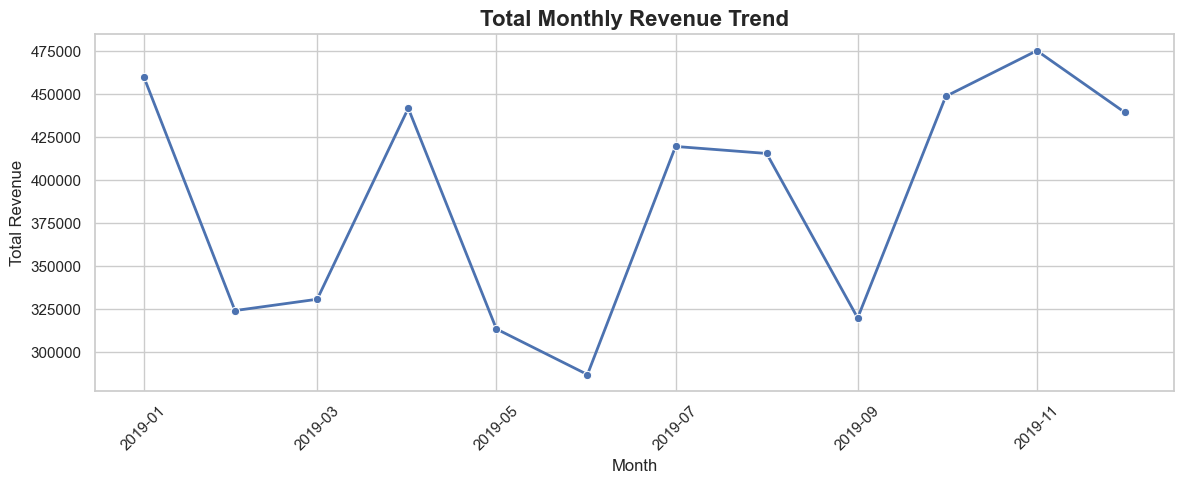

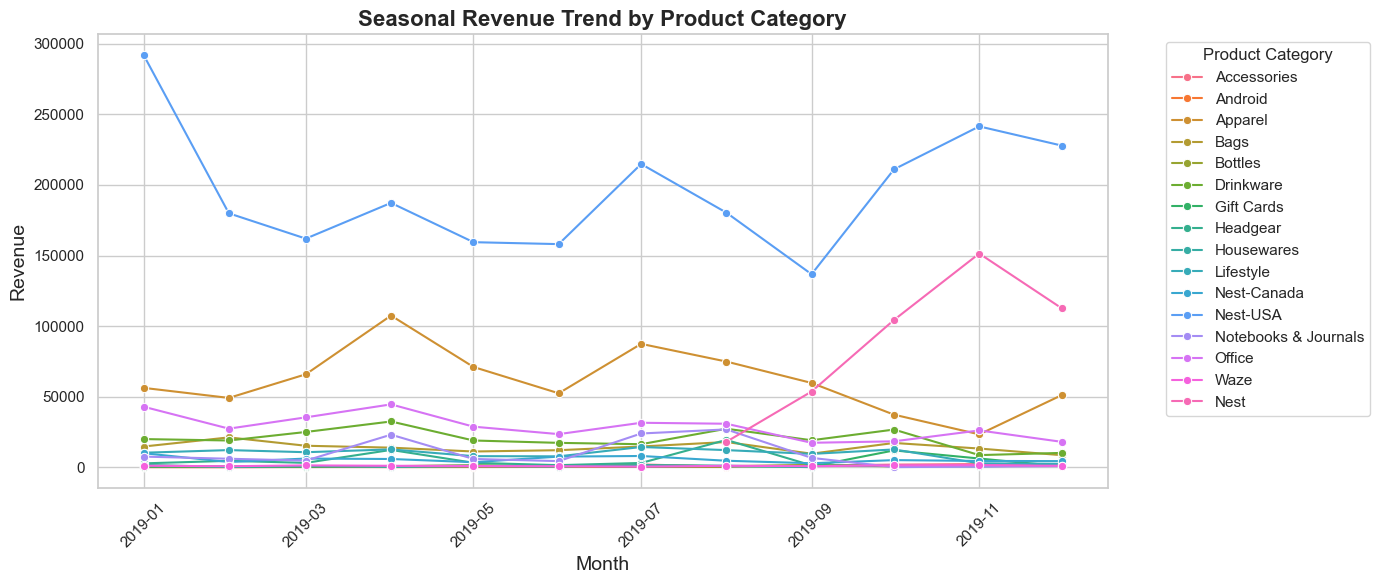

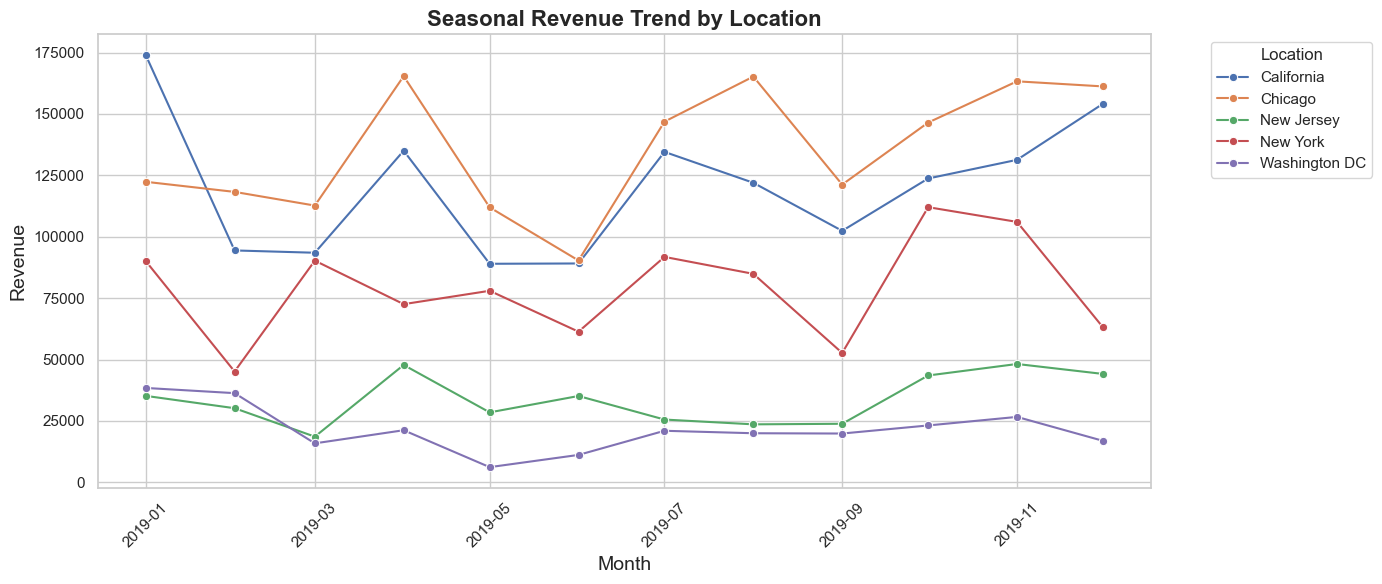

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'transaction_month' is datetime if not already
sales_data['transaction_month'] = pd.to_datetime(sales_data['transaction_month'].astype(str))

# Plot settings
plt.rcParams['figure.figsize'] = (14, 6)

# ===============================
# 1. Monthly Total Revenue Trend
# ===============================
monthly_rev = sales_data.groupby('transaction_month')['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_rev, x='transaction_month', y='Revenue', marker='o', linewidth=2)
plt.title("Total Monthly Revenue Trend", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Revenue",fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==================================
# 2. Seasonal Trend by Product Category
# ==================================
cat_monthly = sales_data.groupby(['transaction_month', 'Product_Category'])['Revenue'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=cat_monthly, x='transaction_month', y='Revenue', hue='Product_Category', marker='o')
plt.title("Seasonal Revenue Trend by Product Category", fontsize=16, fontweight='bold')
plt.xlabel("Month",fontsize=14)
plt.ylabel("Revenue",fontsize=14)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==================================
# 3. Seasonal Trend by Location
# ==================================
loc_monthly = sales_data.groupby(['transaction_month', 'Location'])['Revenue'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=loc_monthly, x='transaction_month', y='Revenue', hue='Location', marker='o')
plt.title("Seasonal Revenue Trend by Location", fontsize=16, fontweight='bold')
plt.xlabel("Month",fontsize=14)
plt.ylabel("Revenue",fontsize=14)
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔍 **Identified Seasonal Trends in Sales (by Category & Location)**

---

#### **1. Overall Monthly Sales Trends**

* **Peaks in January, April, July, October–November** indicate possible seasonality tied to:

  * New Year sales (January)
  * Spring promotions (April)
  * Mid-year sales (July)
  * Festive or holiday shopping (Oct–Nov)

#### **2. Trends by Product Category**

* **"Nest-USA" and "Apparel"** show consistent high revenue across months, especially peaking in:

  * **Nest-USA**: Jan, Jul, Oct–Nov → possibly due to product launches or festive demand.
  * **Apparel**: Peaks in April and October → aligns with seasonal clothing changes.
* **"Office"** spikes in October–November → likely due to year-end business purchases or back-to-work promotions.
* Lower-consistency categories (e.g., Gift Cards, Android, Headgear) show sporadic spikes — potentially tied to promotions or specific events.

#### **3. Trends by Location**

* **Chicago and California** consistently show the **highest revenue**, with **Chicago peaking in April and August**.
* **New York and New Jersey** show modest but relatively stable trends.
* **Washington DC** remains the lowest across all months, indicating either low market penetration or limited demand.

---

### 📈 **Strategic Recommendations to Maximize Revenue**

#### 🛍️ **For Peak Seasons:**

* **Inventory Planning**: Stock high-demand categories (Nest-USA, Apparel, Office) ahead of Jan, Apr, Jul, Oct–Nov.
* **Targeted Promotions**: Run tailored campaigns for Chicago and California — your top-performing regions.
* **Bundling Offers**: Promote bundles during peak times to increase cart value.

#### 🧘 **For Off-Peak Seasons:**

* **Boost Low Months (e.g., February, June, September)** with:

  * Discount campaigns or flash sales.
  * Target underperforming regions (like Washington DC) with local marketing.
* **Test New Products**: Introduce and promote new categories when major ones are flat.

#### 📍 **Location-Specific Strategy:**

* **Chicago**: Focus on Apparel and Nest-USA during Apr & Aug.
* **California**: Push broader range — consistent consumer base.
* **Washington DC**: Explore reasons for low sales — demographics, shipping, or lack of awareness.

---


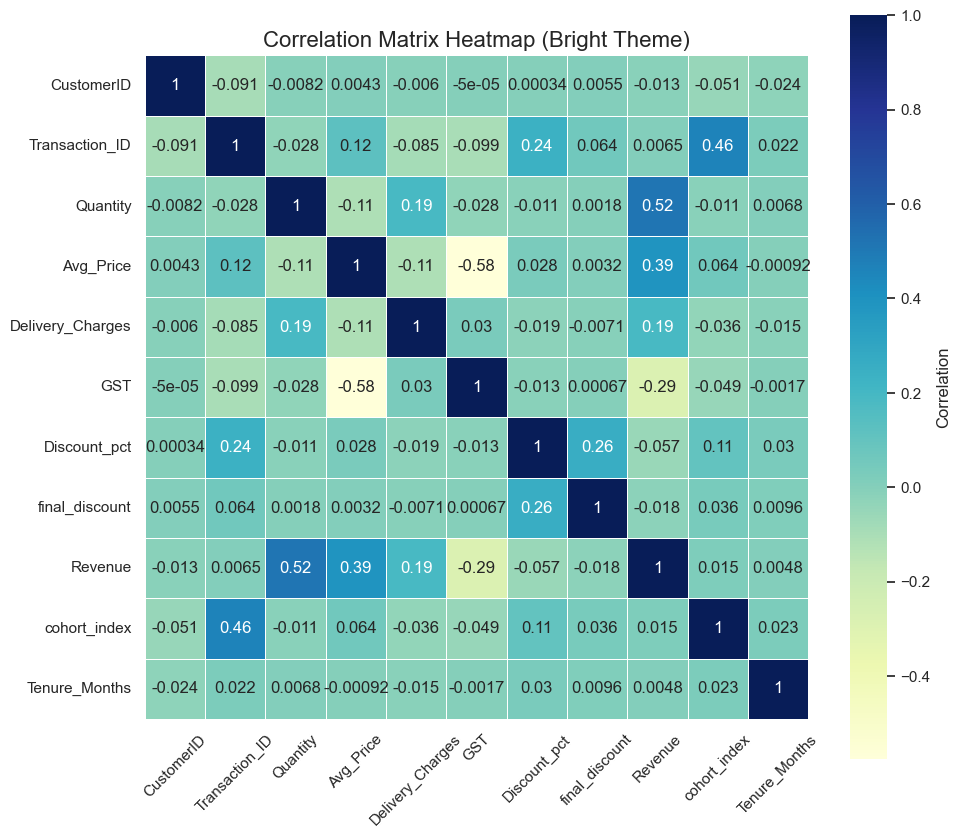

In [80]:
# Select only numeric columns
numeric_df = sales_data.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 10))  # Increased size for clarity
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='YlGnBu',          # Brighter and easier on the eyes
    linewidths=0.6,
    linecolor='white',
    square=True,            # Make each cell square
    cbar_kws={'shrink': 0.8, 'label': 'Correlation'}
)
plt.title('Correlation Matrix Heatmap (Bright Theme)', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Question 20
###

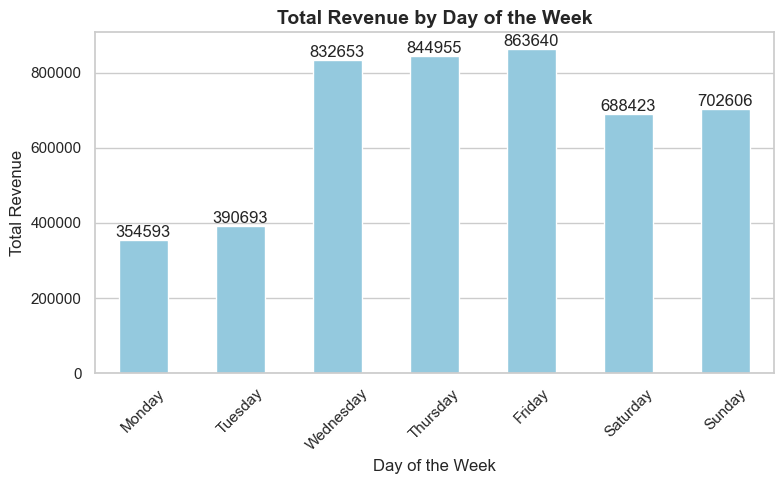

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract day of the week
sales_data['Day_of_Week'] = sales_data['Transaction_Date'].dt.day_name()

# Group by day of the week and calculate revenue
daily_sales = sales_data.groupby('Day_of_Week')['Revenue'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

plt.figure(figsize=(8, 5))
ax=sns.barplot(x='Day_of_Week', y='Revenue', data=daily_sales, color='skyblue',width=0.5)
plt.title('Total Revenue by Day of the Week',fontweight='bold',fontsize=14)
plt.ylabel('Total Revenue',fontsize=12)
plt.xlabel('Day of the Week',fontsize=12)
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()


In [82]:
sales_data['Transaction_Date'].dt.day_name()

0        Tuesday
1        Tuesday
2        Tuesday
3        Tuesday
4        Tuesday
          ...   
52519    Tuesday
52520    Tuesday
52521    Tuesday
52522    Tuesday
52523    Tuesday
Name: Transaction_Date, Length: 52524, dtype: object

In [83]:
daily_sales

,Day_of_Week,Revenue
0,Monday,354592.69650
1,Tuesday,390692.97623
2,Wednesday,832653.14082
3,Thursday,844954.58825
4,Friday,863640.25308
5,Saturday,688422.92491
6,Sunday,702605.63888


In [84]:
sales_data.groupby('Day_of_Week')['Revenue'].sum()

Day_of_Week
Friday       863640.25308
Monday       354592.69650
Saturday     688422.92491
Sunday       702605.63888
Thursday     844954.58825
Tuesday      390692.97623
Wednesday    832653.14082
Name: Revenue, dtype: float64